In [1]:
from google.colab import drive
drive.mount('/project3/')

Mounted at /project3/


In [3]:
import pandas as pd
import os

folder_path = '/project3/MyDrive/Colab Notebooks/EnergyDataFiles'

In [ ]:
# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, filename)

        data = pd.read_csv(file_path)

        
        if 'DateAndTime' in data.columns:
            new = data["DateAndTime"].str.split("T", n=1, expand=True)
            data["Date"] = new[0]
            data["Time"] = new[1]
            data.drop(columns=['DateAndTime'], inplace=True)

            
            first_column = data.pop('Date')
            second_column = data.pop('Time')
            data.insert(0, 'Date', first_column)
            data.insert(1, 'Time', second_column)

            data.to_csv(file_path, index=False)
   print(data.head())



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 25)

In [ ]:
import pandas as pd
import os

folder_path = '/project3/MyDrive/Colab Notebooks/EnergyDataFiles'


for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)

        data = pd.read_csv(file_path)

        
        if 'DateAndTime' in data.columns:
            
            new = data["DateAndTime"].str.split("T", n=1, expand=True)
            data["Date"] = new[0]
            data["Time"] = new[1]
            data.drop(columns=['DateAndTime'], inplace=True)

            
            first_column = data.pop('Date')
            second_column = data.pop('Time')
            data.insert(0, 'Date', first_column)
            data.insert(1, 'Time', second_column)

            
            data.to_csv(file_path, index=False)
print(data.head())

         Date          Time                                      rActVal  \
0         NaN           NaN  dbAppCtrl."Hmi"."Obj"."EB"."Proc"."rActVal"   
1  2022-10-11  15:59:39.274                                      23.2967   
2  2022-10-11  15:59:39.274                                      23.2967   
3  2022-10-11  15:59:40.278                                     23.44322   
4  2022-10-11  15:59:41.280                                     23.34554   

                                               value  \
0  |var|CPX-E-CEC-C1.Application.GVL.PowerMeter.A...   
1                                           5743.188   
2                                           5743.188   
3                                           5743.206   
4                                           5743.219   

                                                unit  \
0  |var|CPX-E-CEC-C1.Application.GVL.PowerMeter.A...   
1                                                 Wh   
2                                     

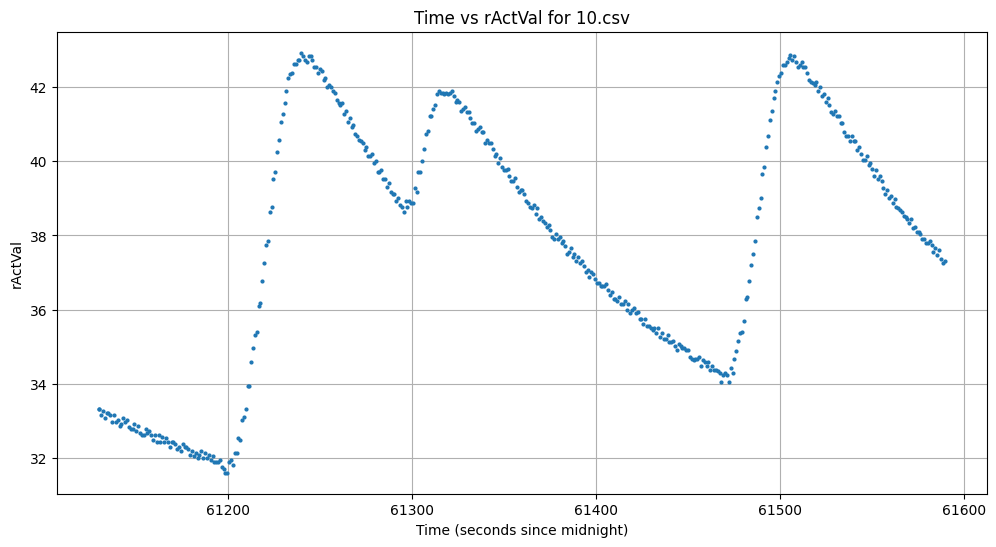

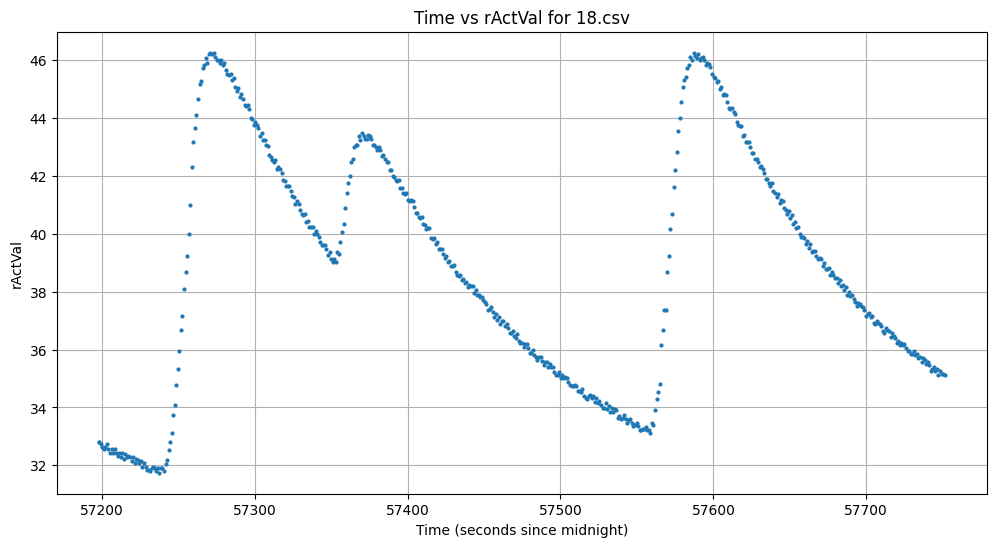

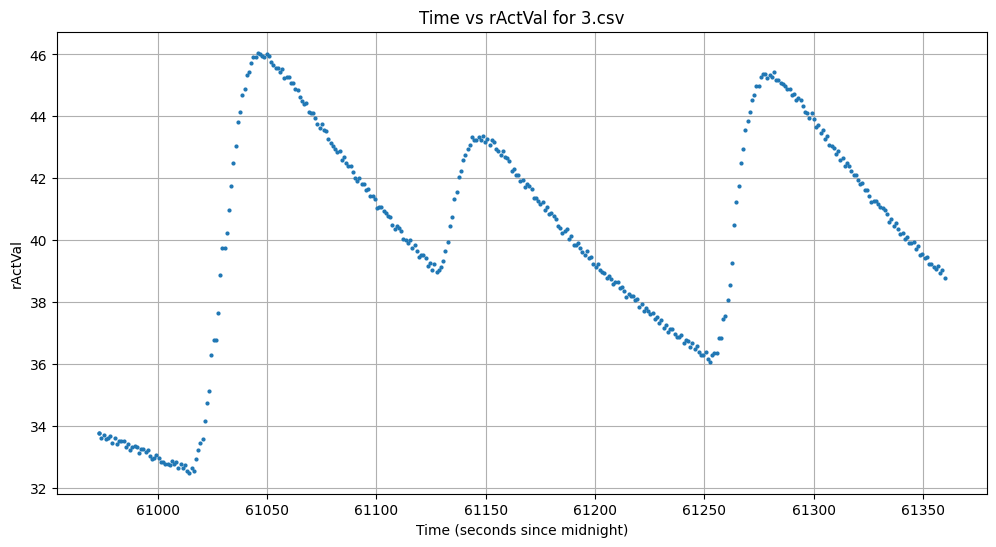

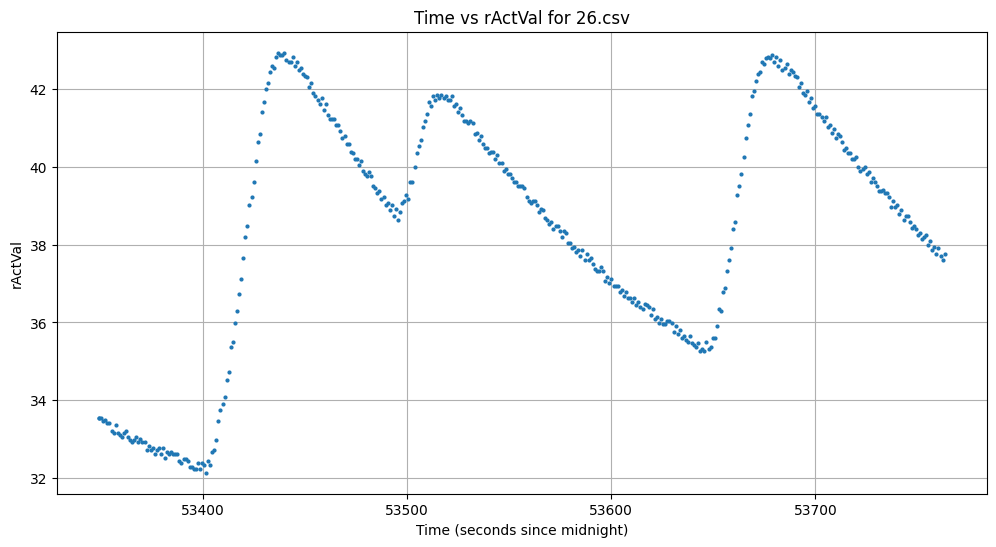

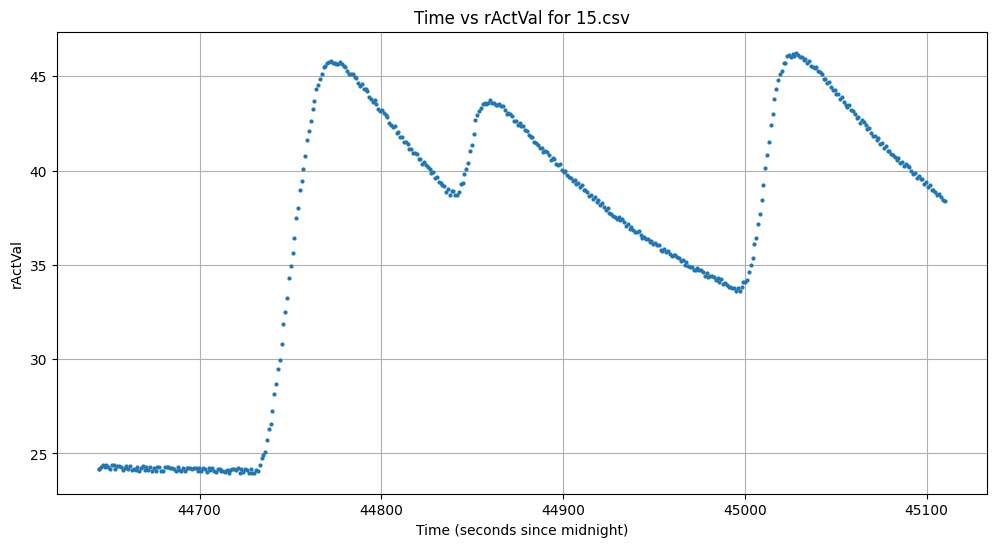

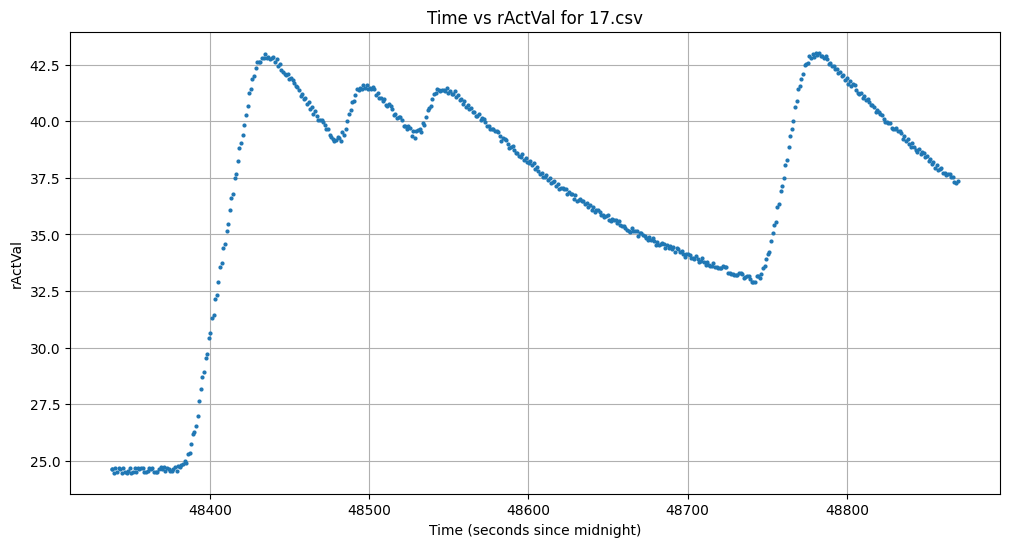

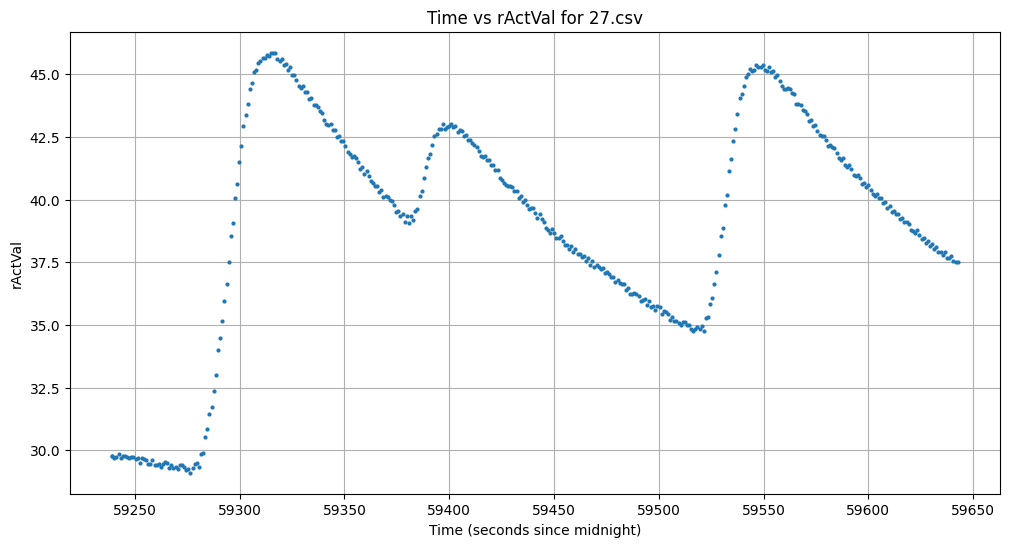

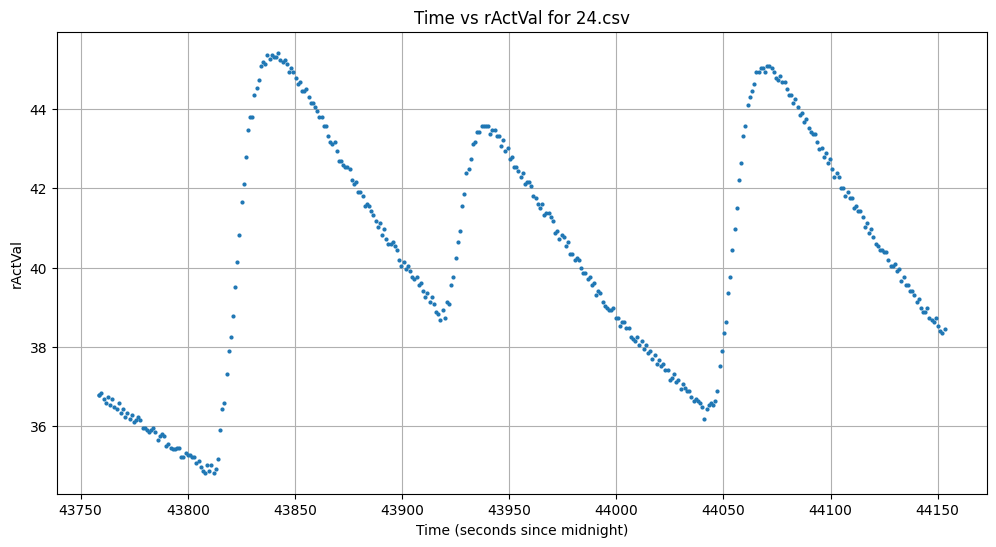

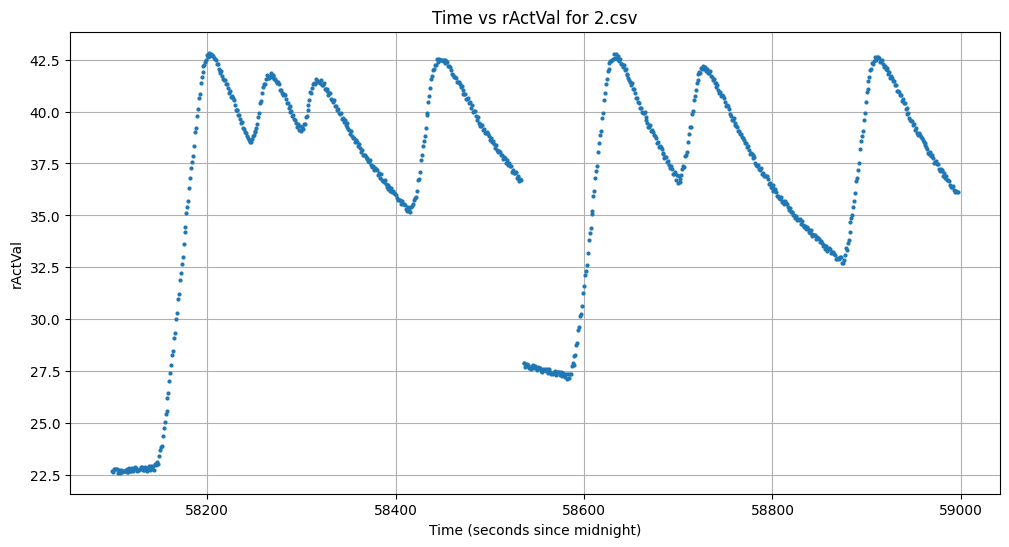

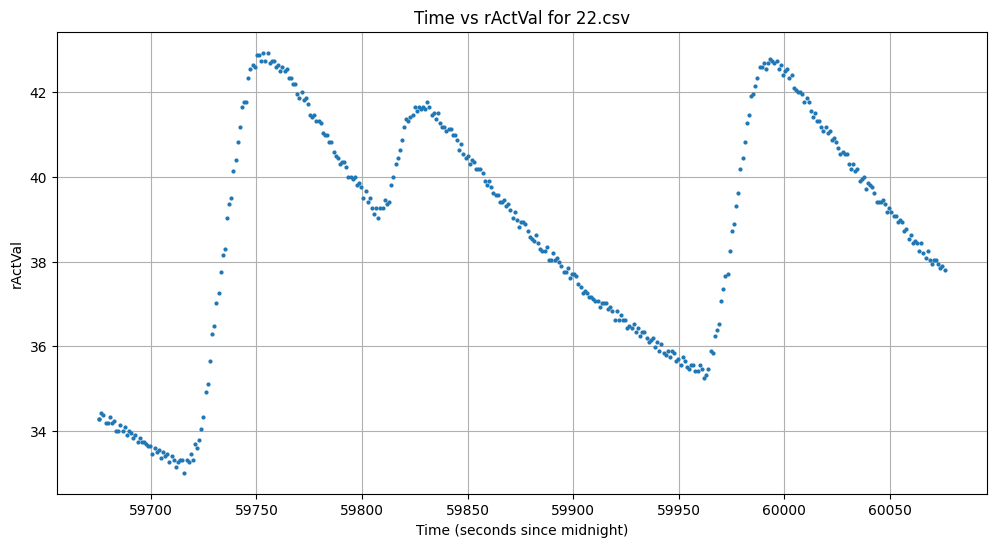

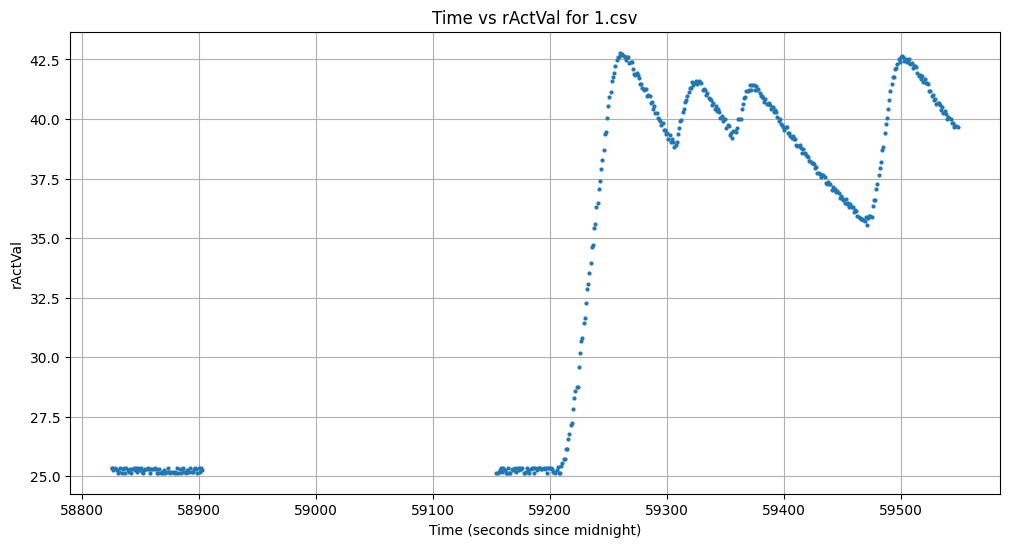

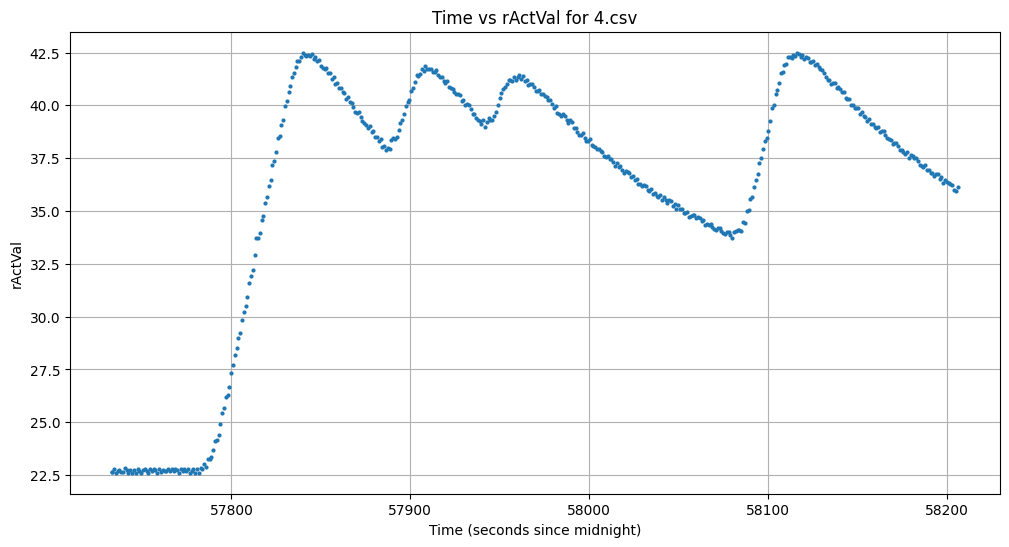

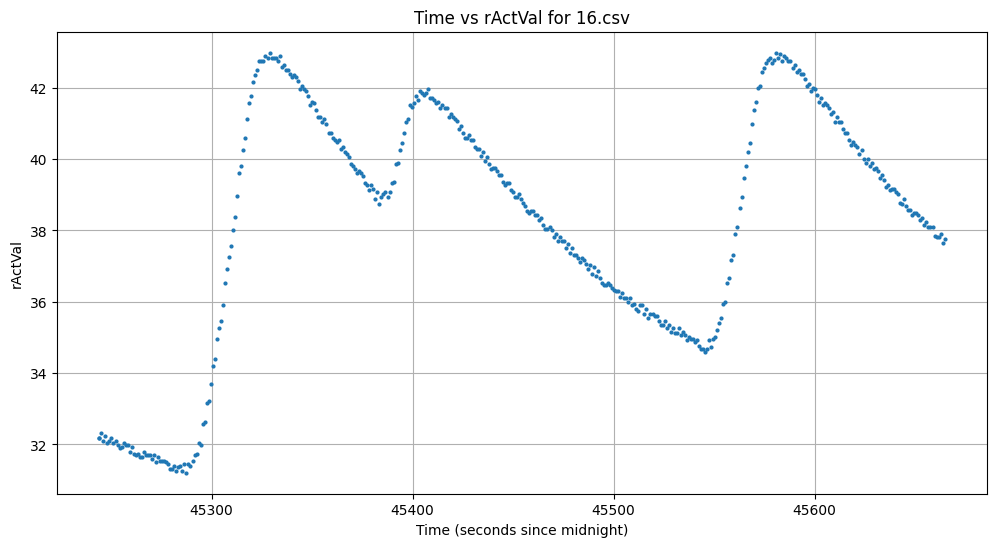

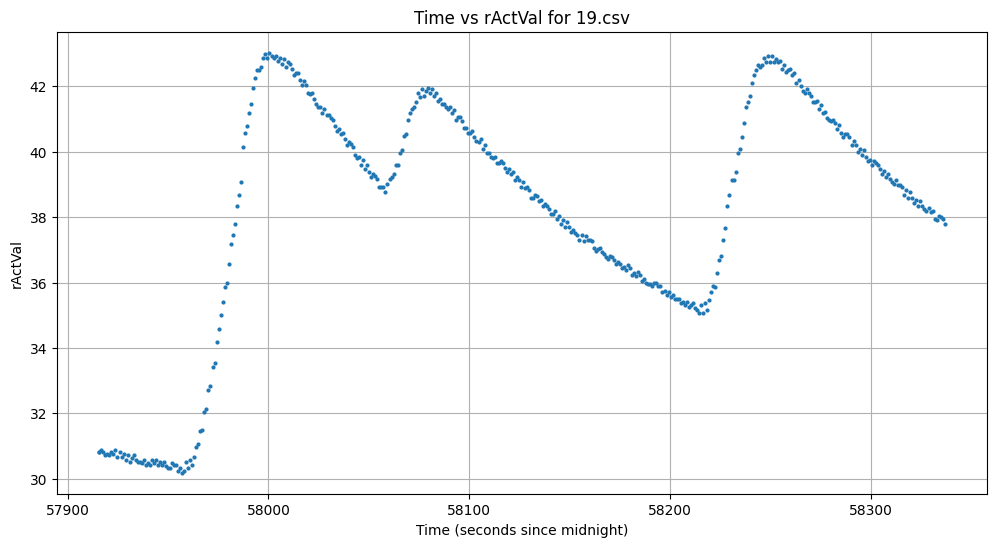

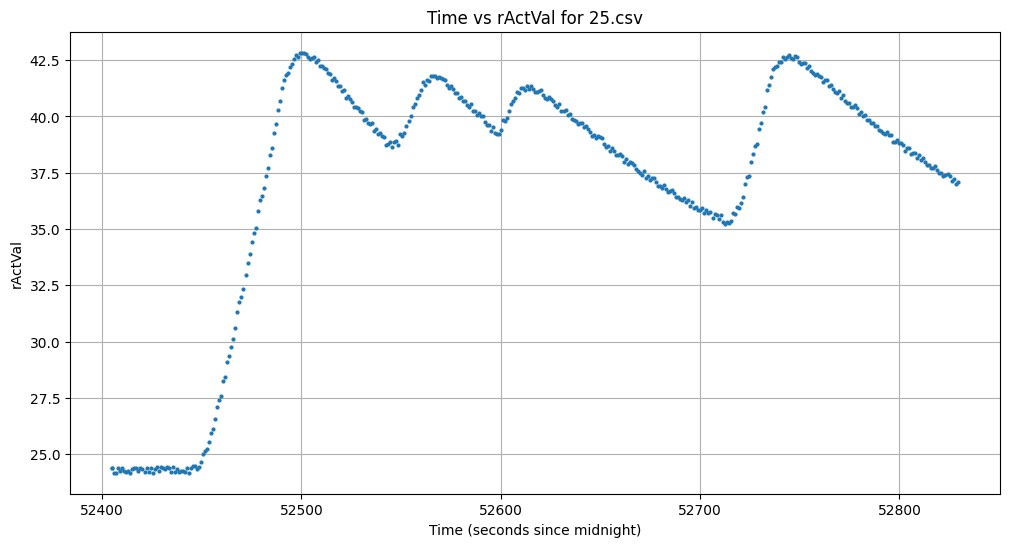

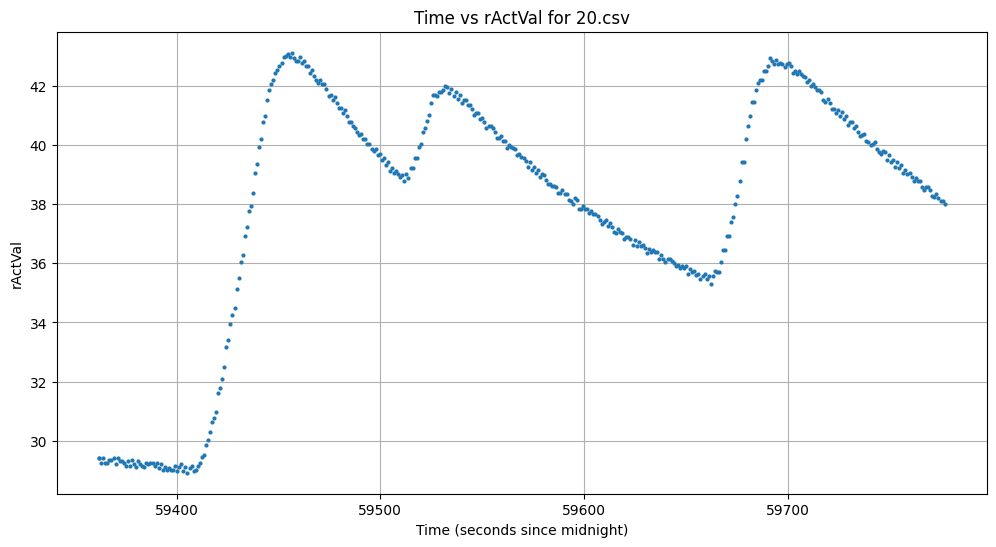

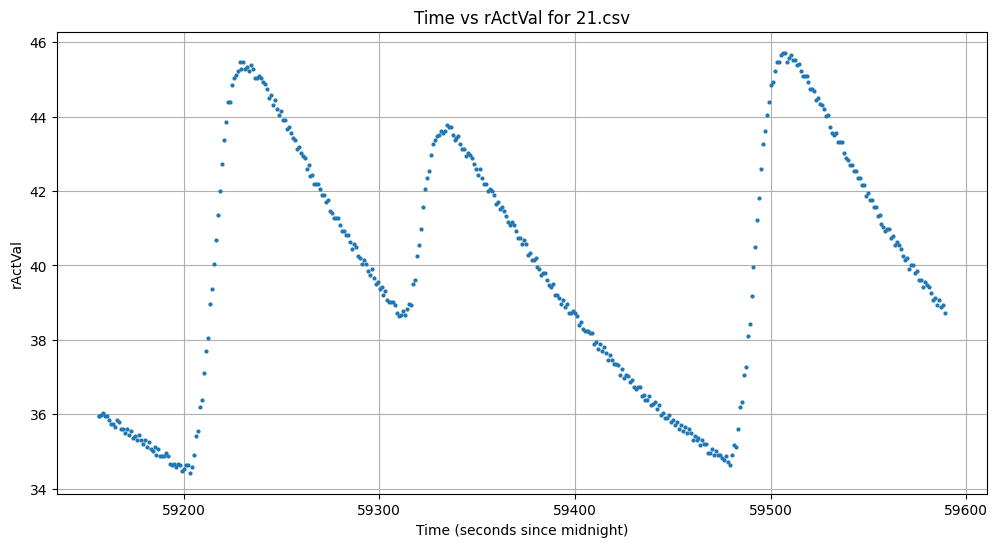

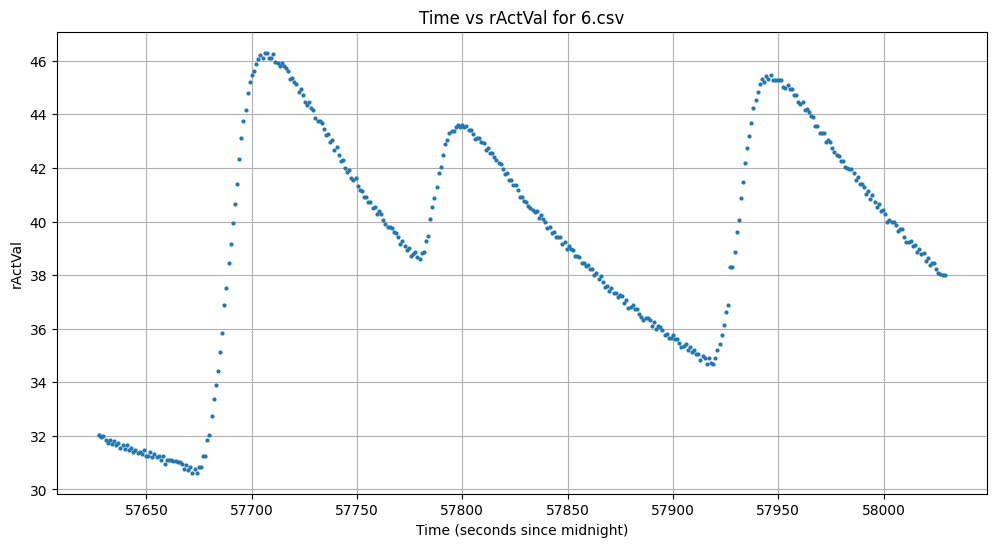

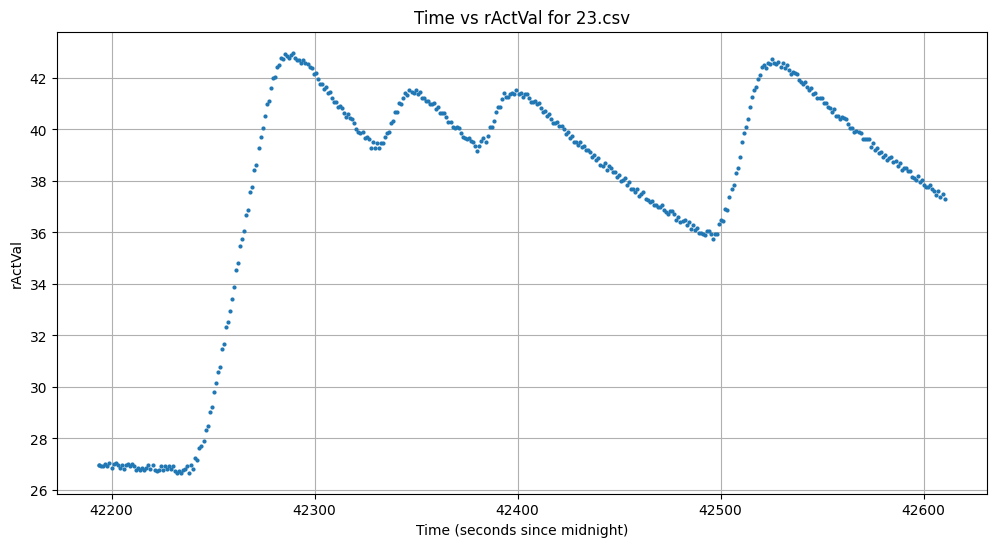

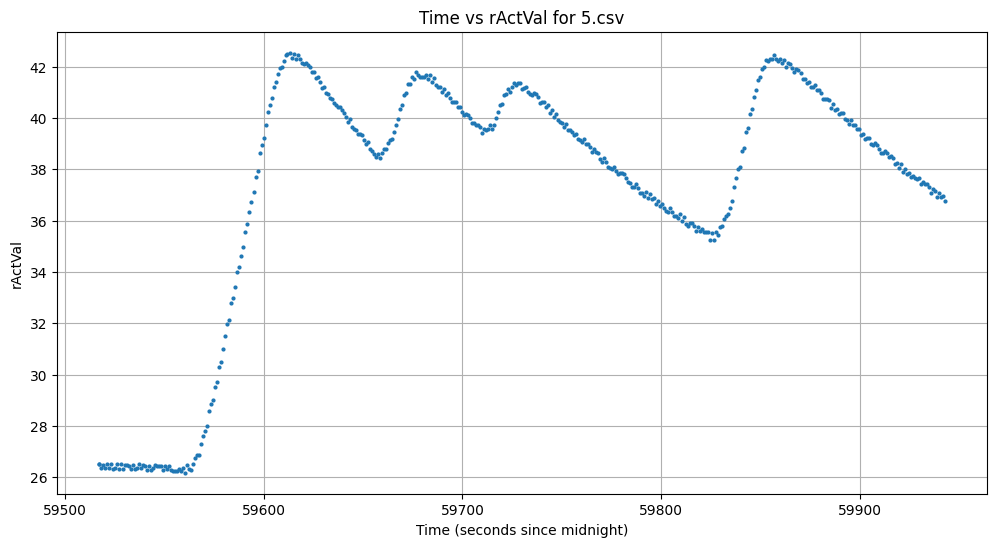

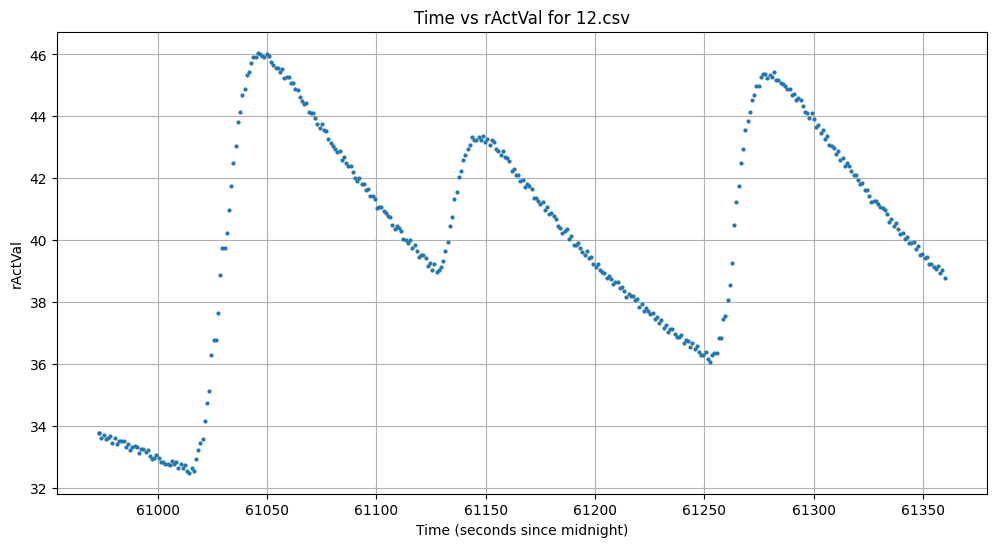

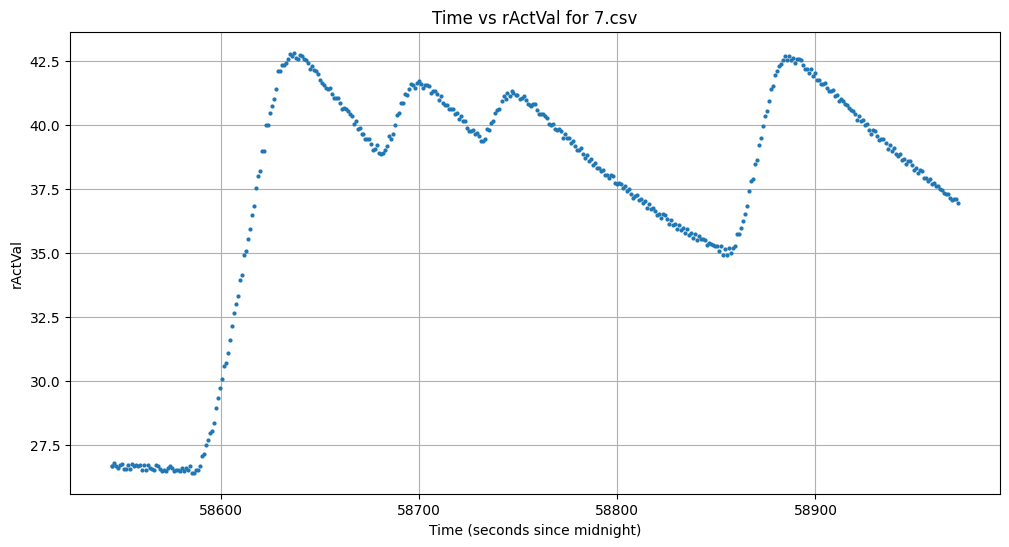

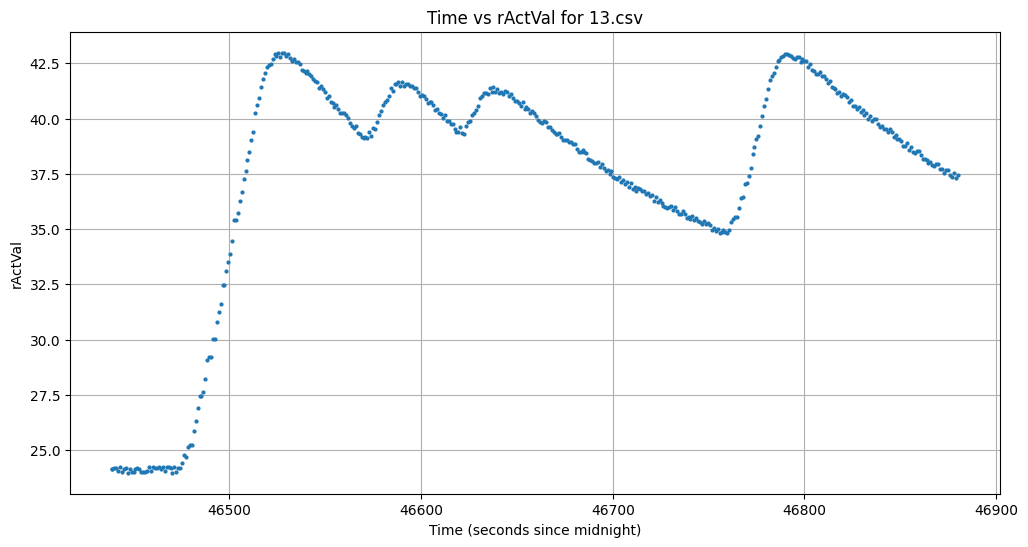

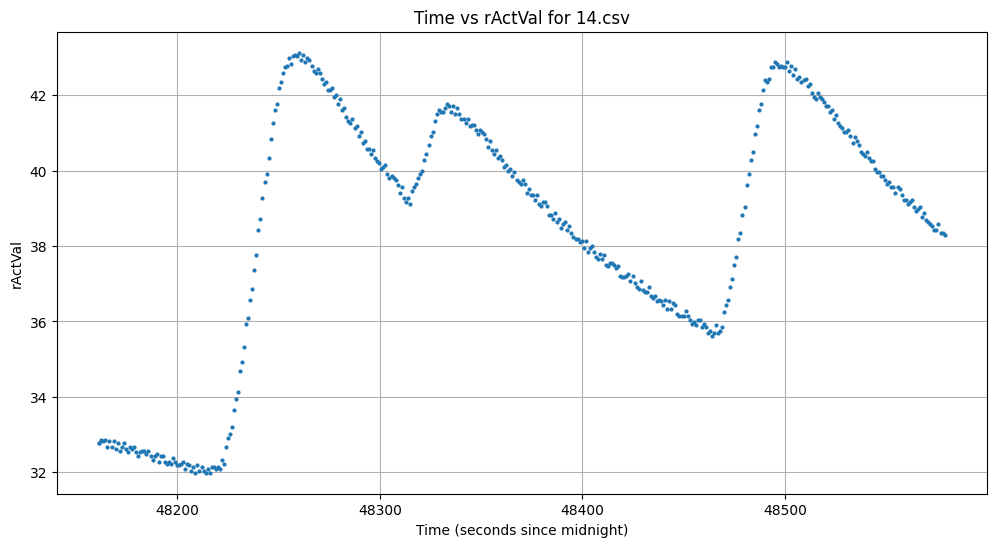

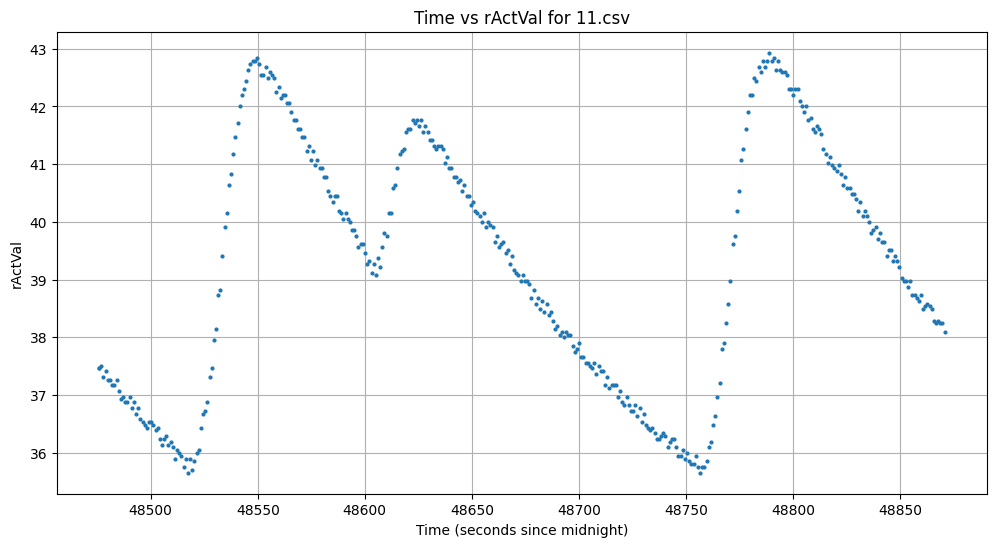

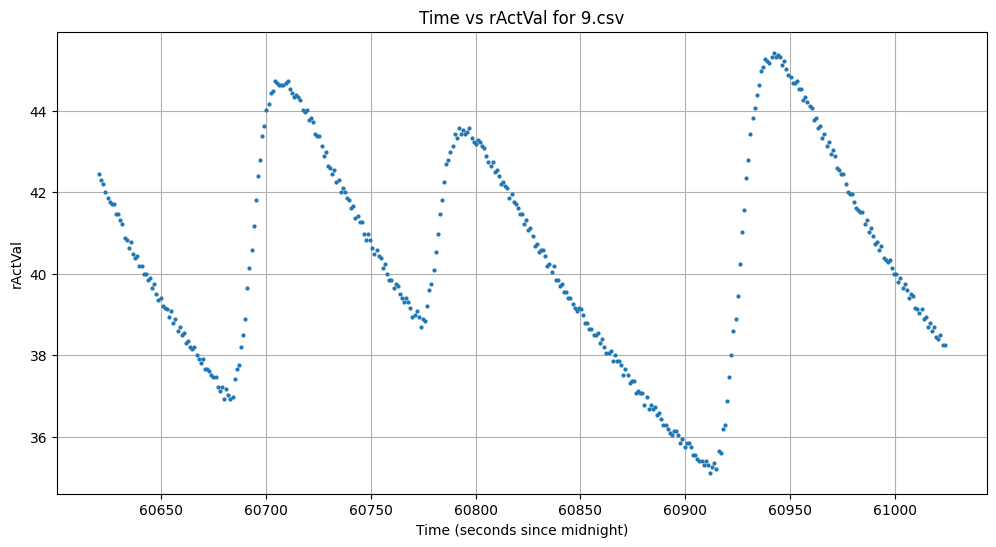

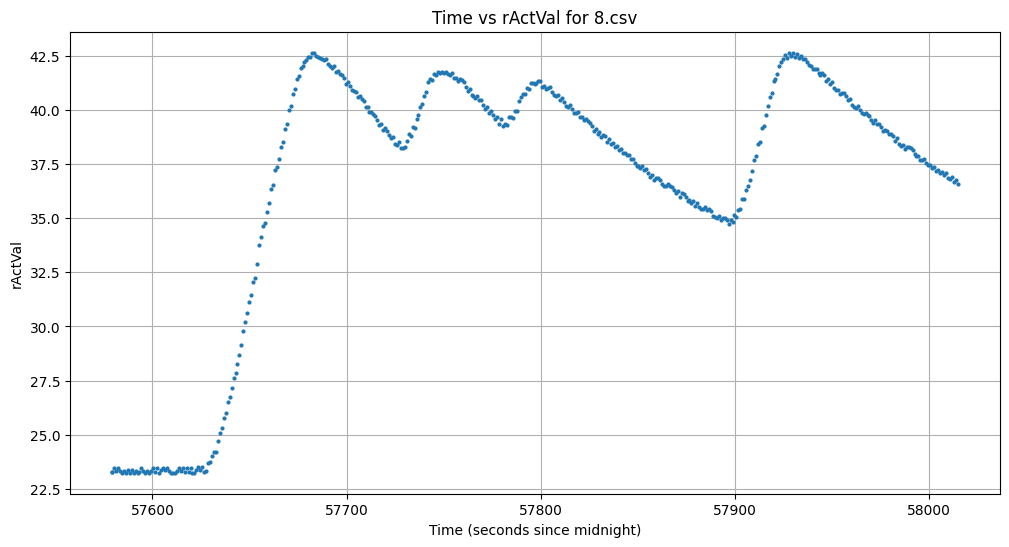

All files have been processed and plots are displayed.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

folder_path = '/project3/MyDrive/Colab Notebooks/EnergyDataFiles'


def time_to_seconds(time_str):
    try:
        return (datetime.strptime(time_str, '%H:%M:%S.%f') - datetime.strptime('00:00:00.0', '%H:%M:%S.%f')).total_seconds()
    except ValueError:
        return (datetime.strptime(time_str, '%H:%M:%S') - datetime.strptime('00:00:00', '%H:%M:%S')).total_seconds()


for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  
        file_path = os.path.join(folder_path, filename)

        
        data = pd.read_csv(file_path)
        
        data = data.drop(0).reset_index(drop=True)

        data['Time'] = data['Time'].astype(str)

        data['TimeInSeconds'] = data['Time'].apply(time_to_seconds)

        data['rActVal'] = pd.to_numeric(data['rActVal'], errors='coerce')

        data = data.dropna(subset=['TimeInSeconds', 'rActVal'])

        plt.figure(figsize=(12, 6))
        plt.plot(data['TimeInSeconds'], data['rActVal'], marker='o', linestyle='', markersize=2)
        plt.title(f'Time vs rActVal for {filename}')
        plt.xlabel('Time (seconds since midnight)')
        plt.ylabel('rActVal')
        plt.grid(True)
        plt.show()

        plt.close()  

print("All files have been processed and plots are displayed.")

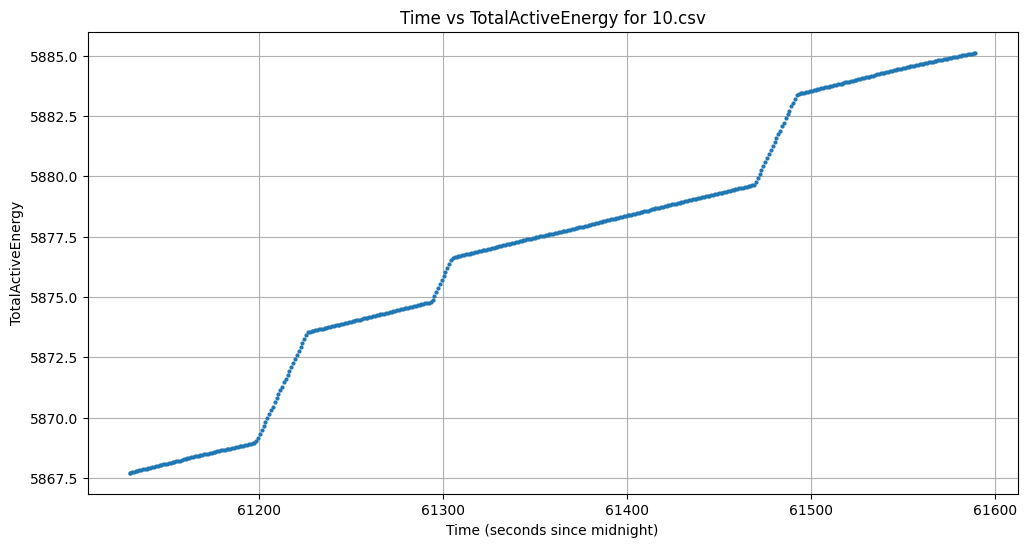

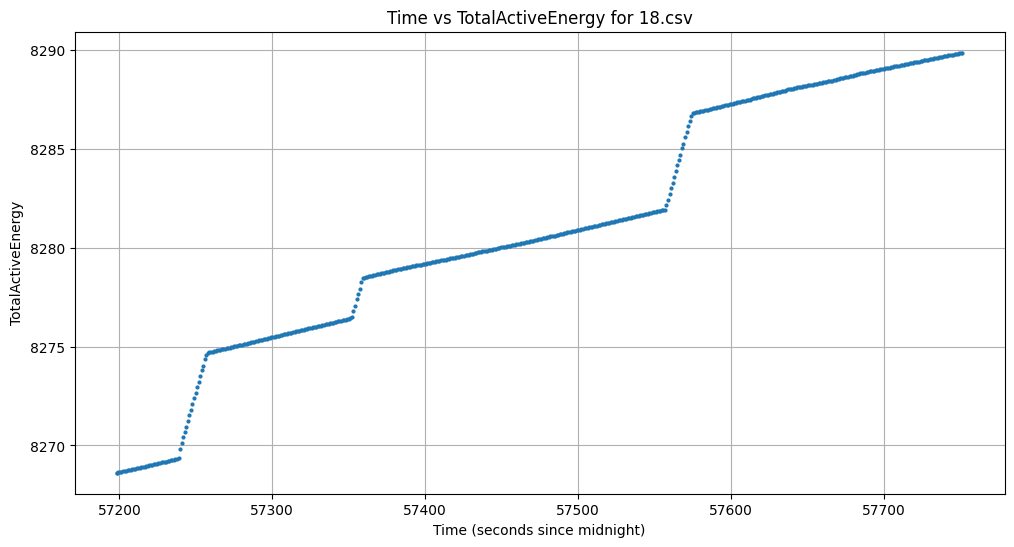

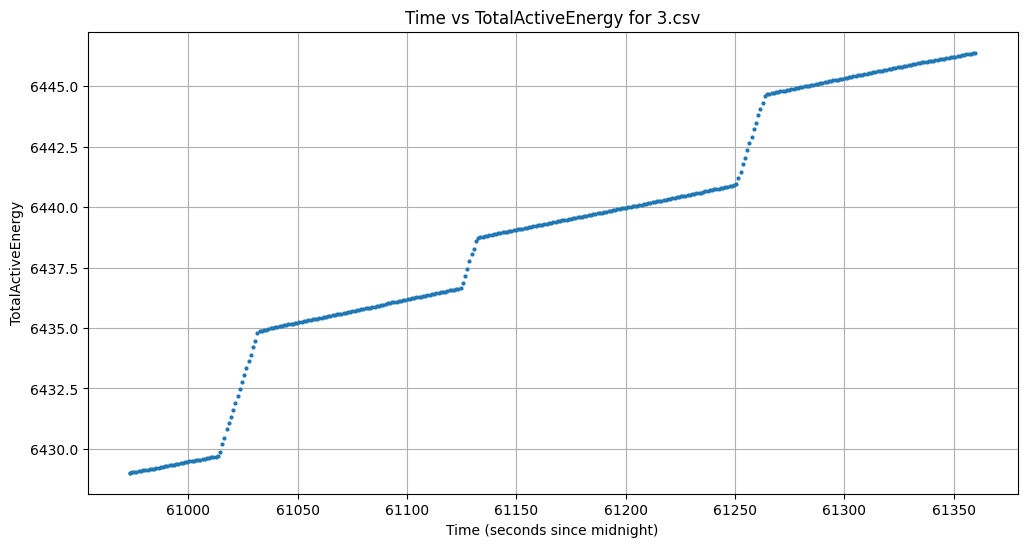

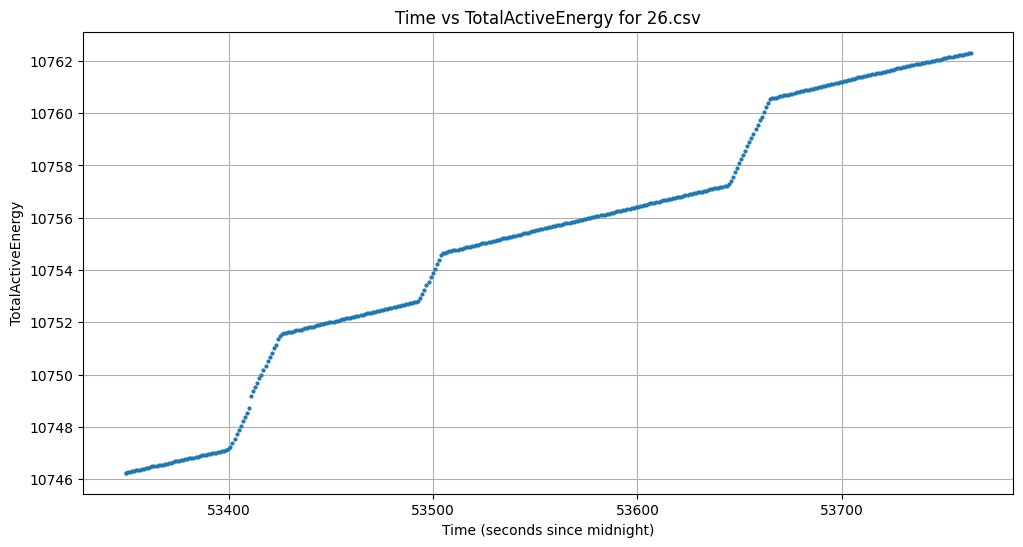

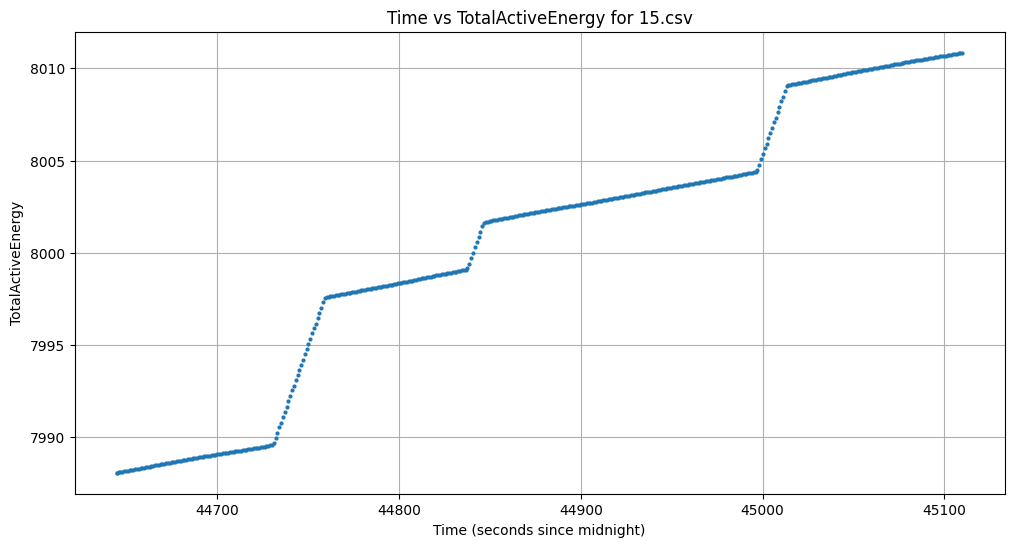

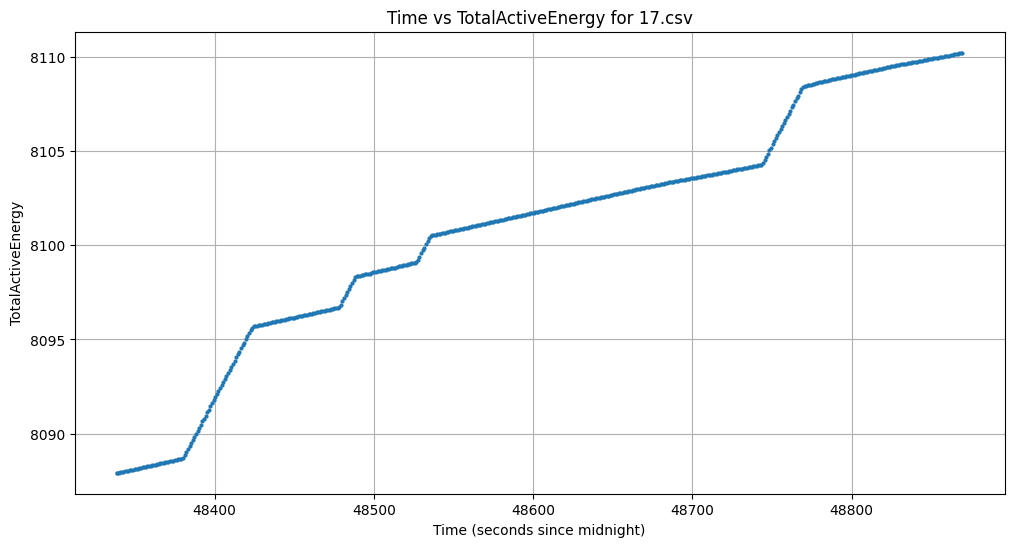

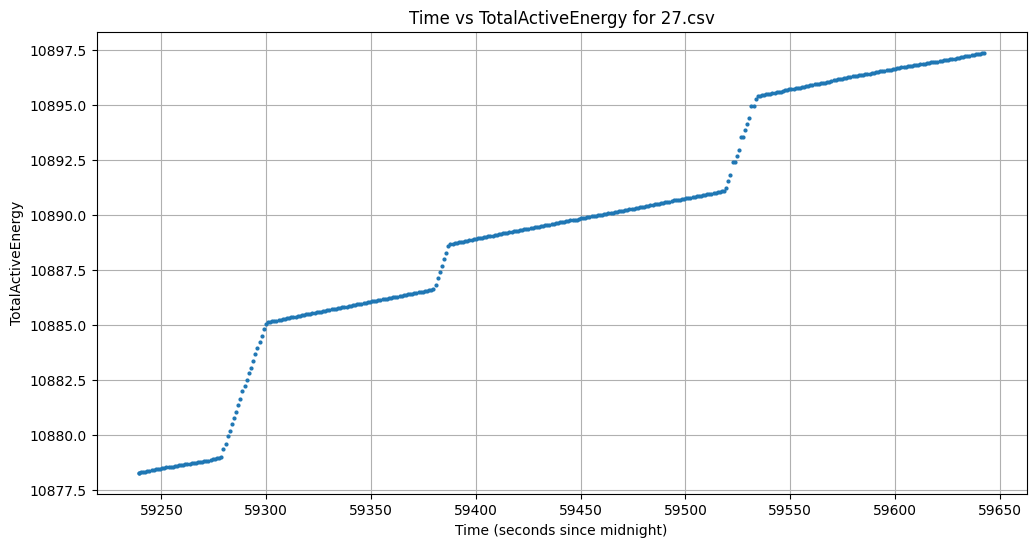

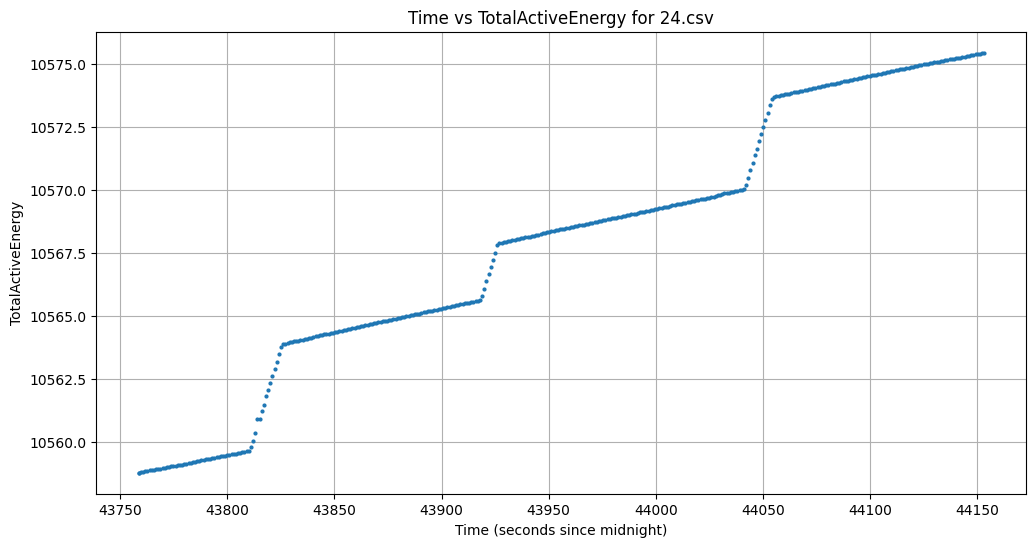

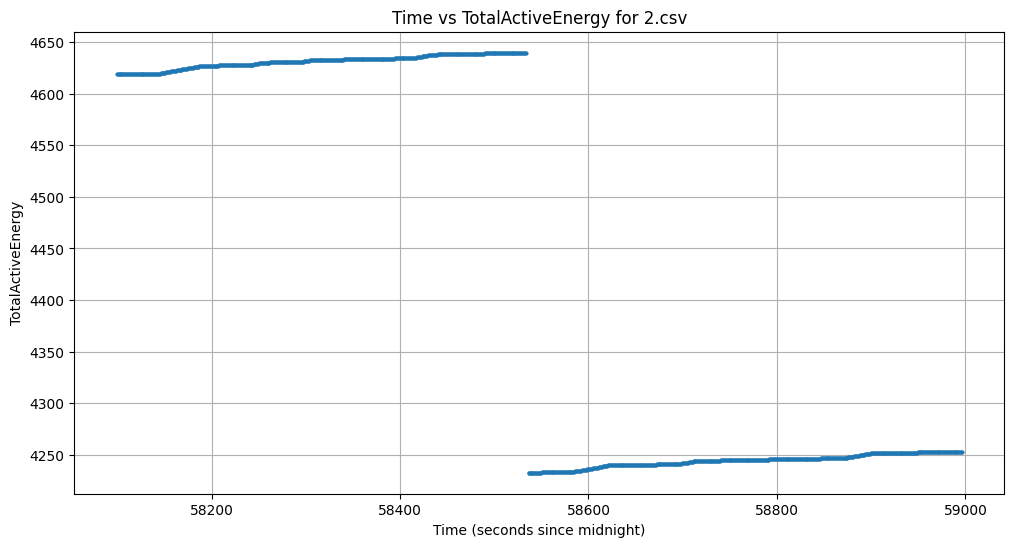

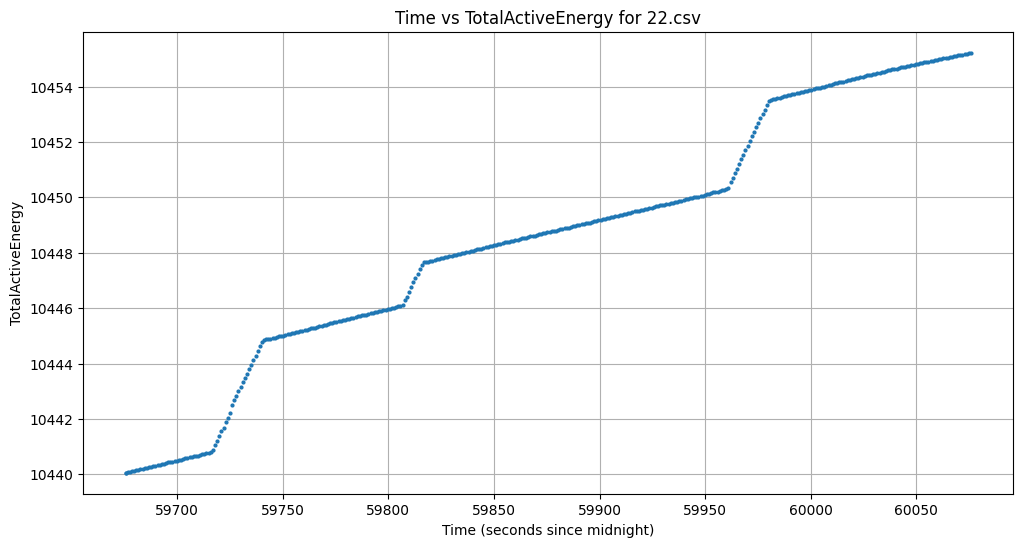

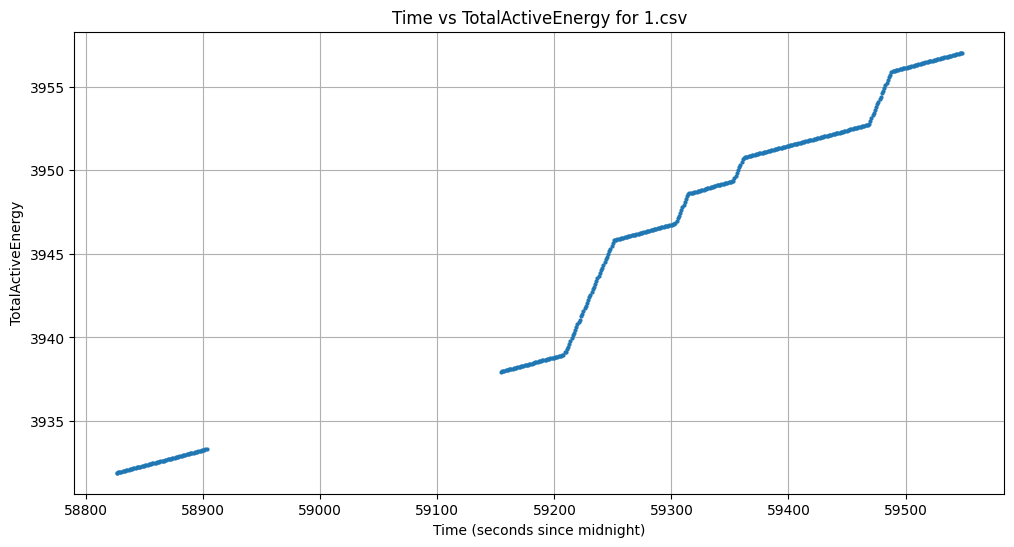

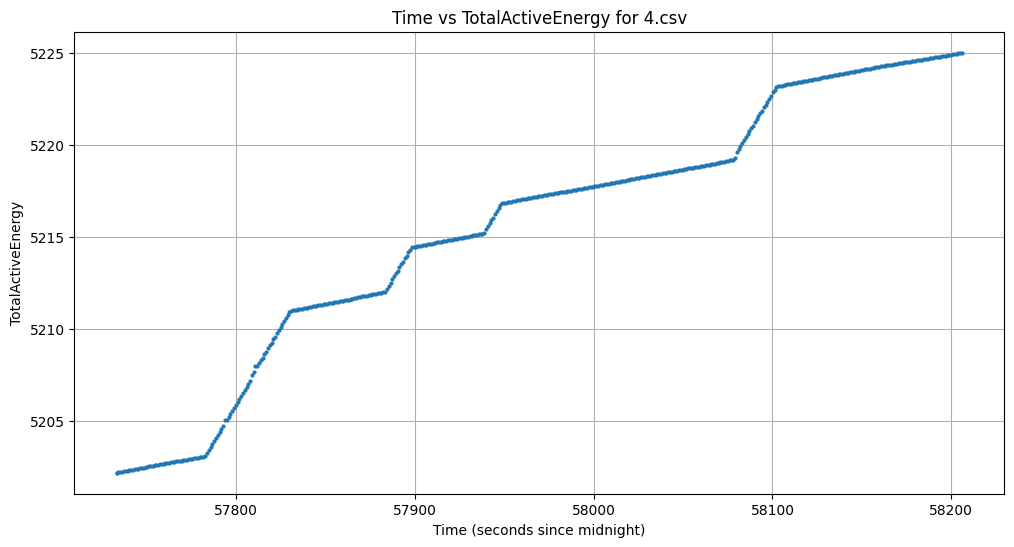

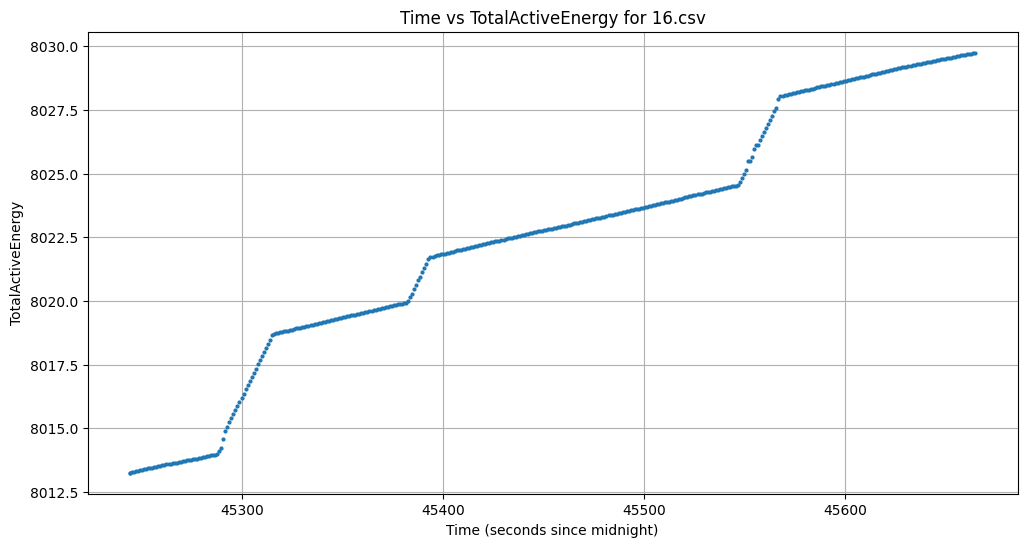

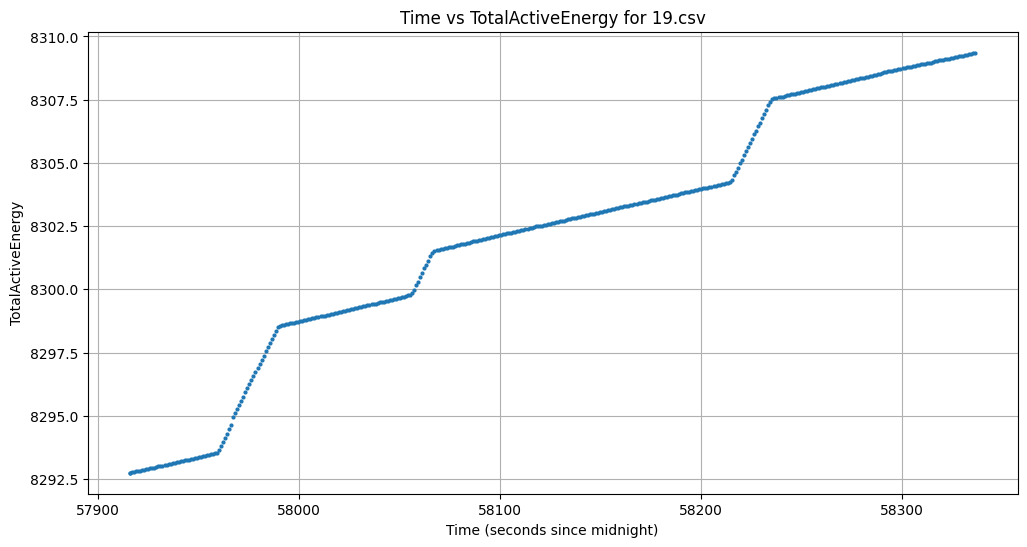

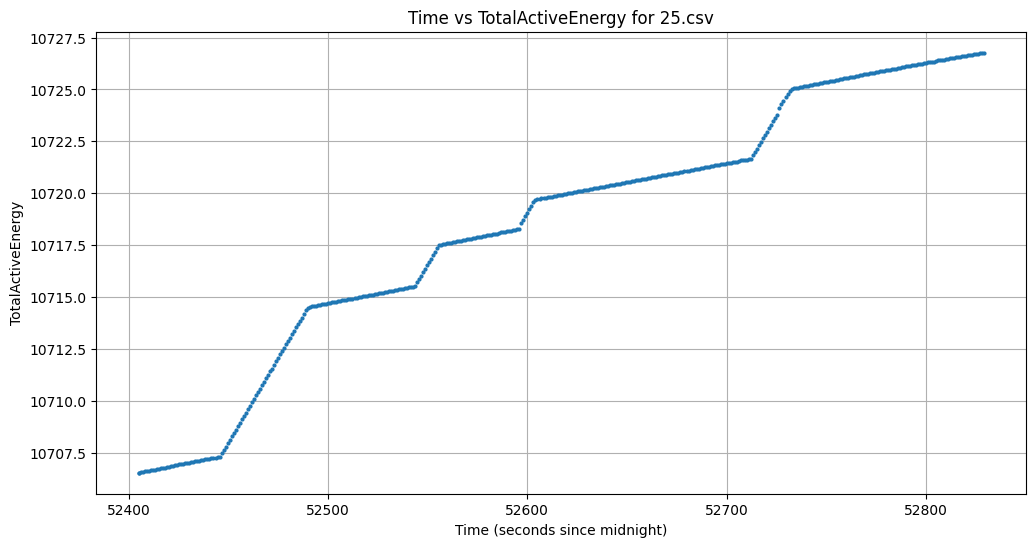

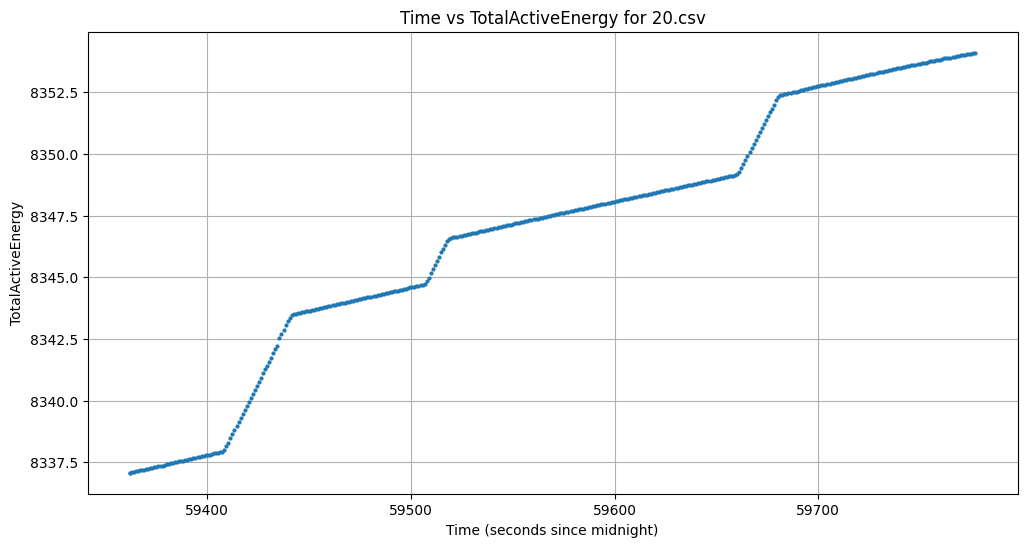

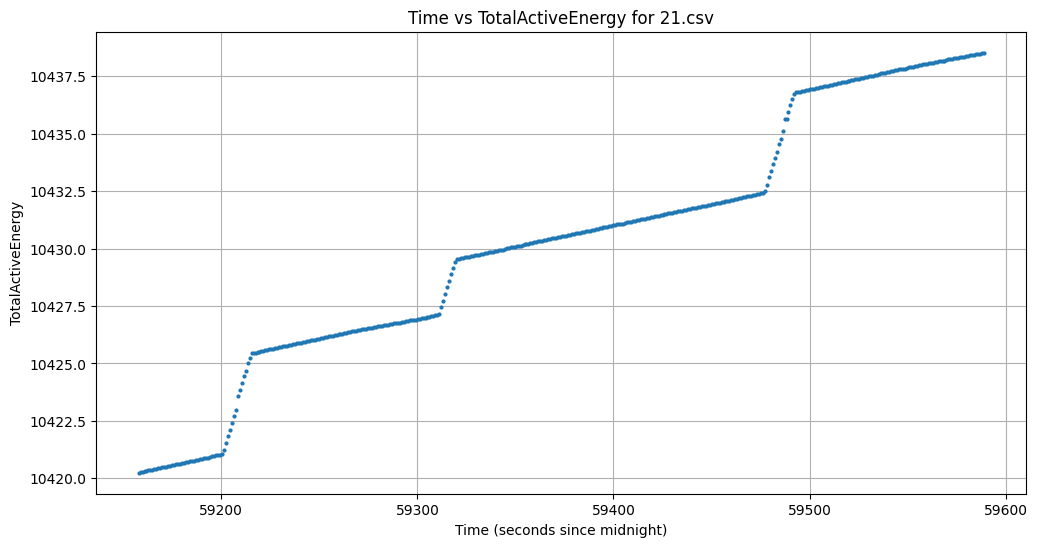

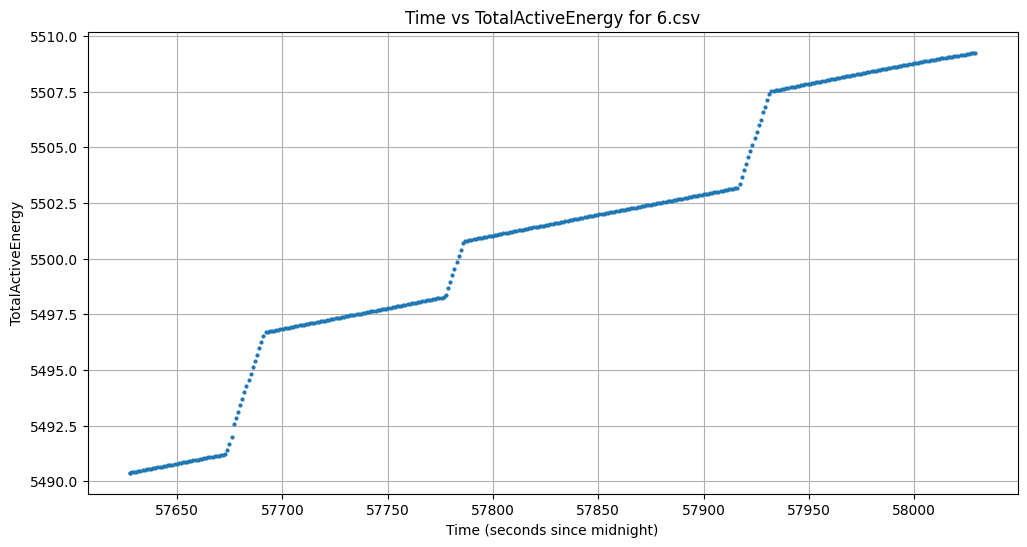

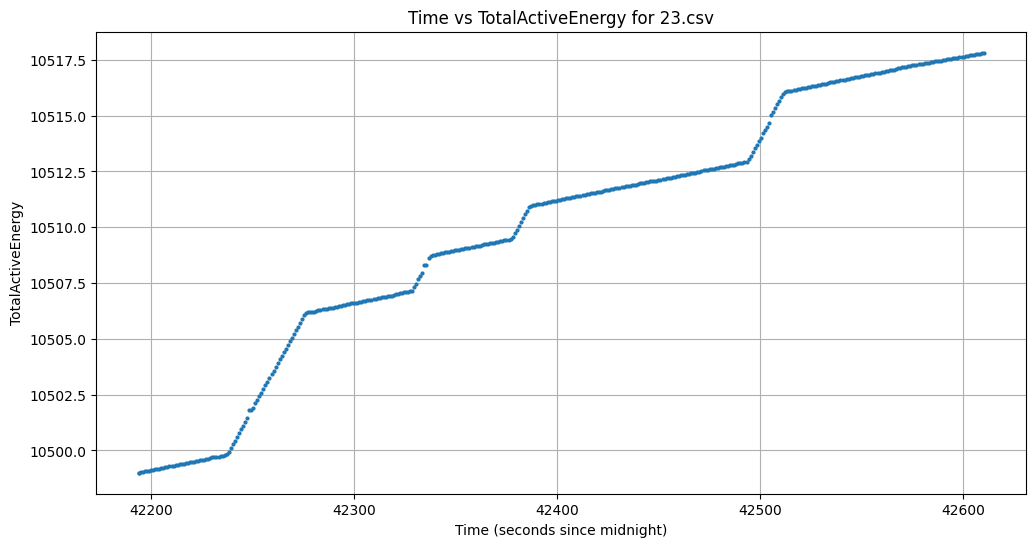

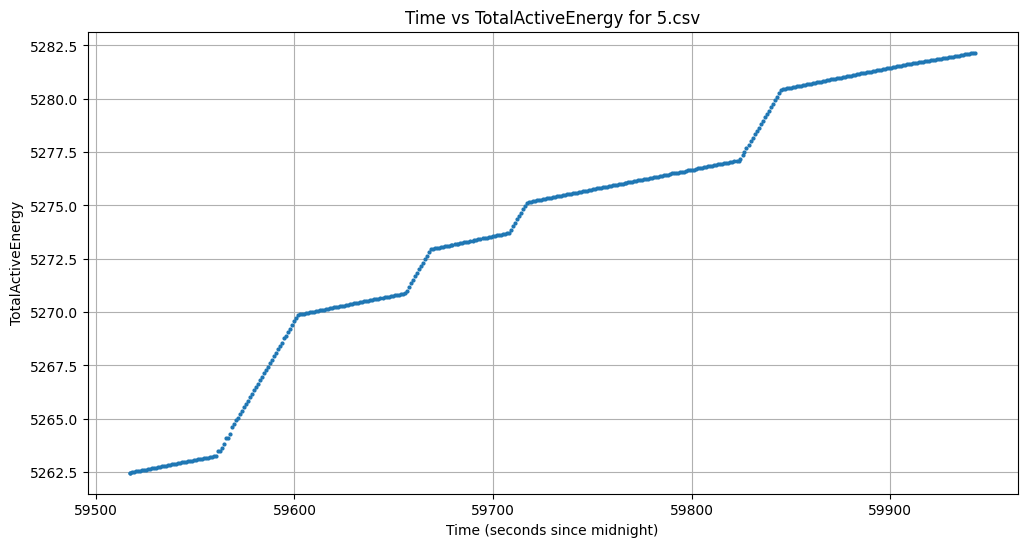

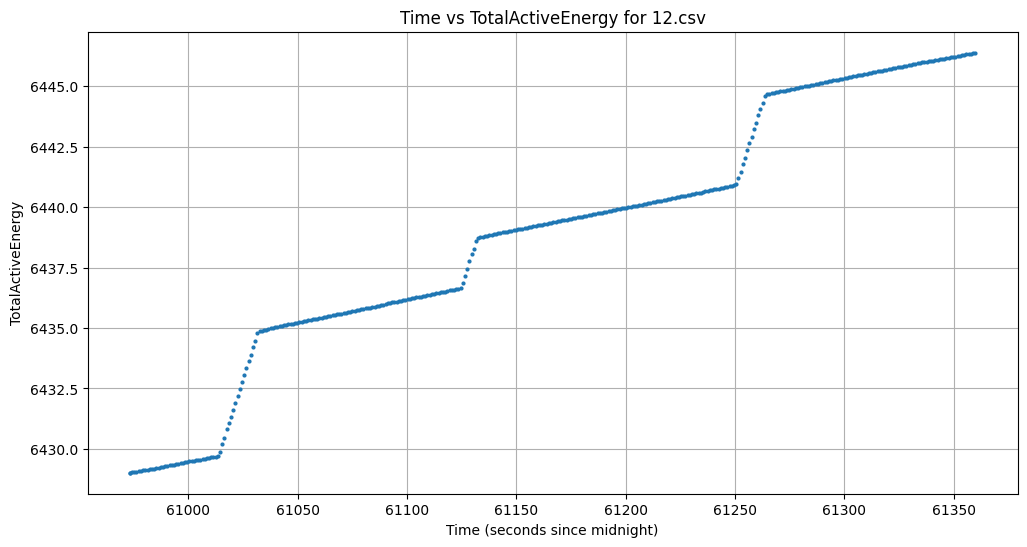

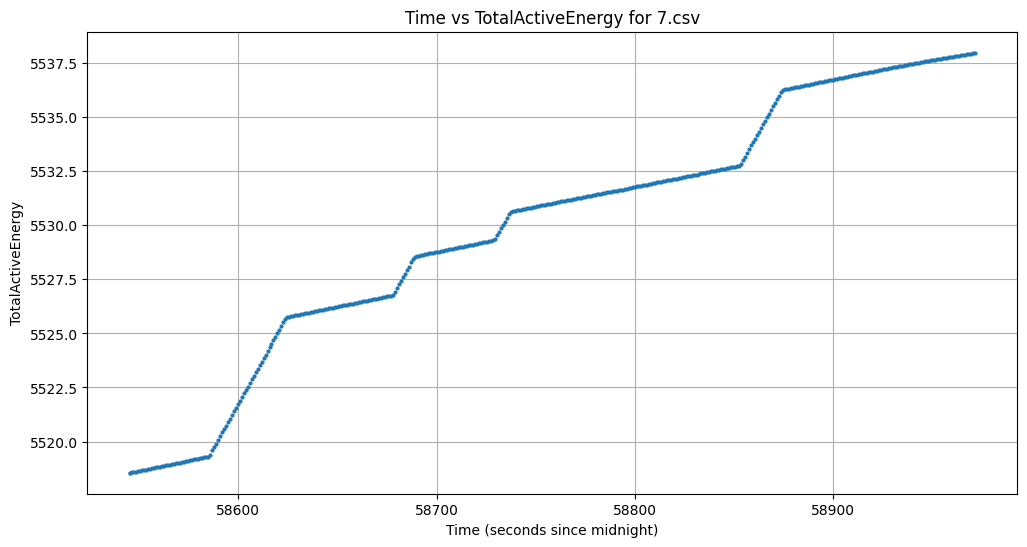

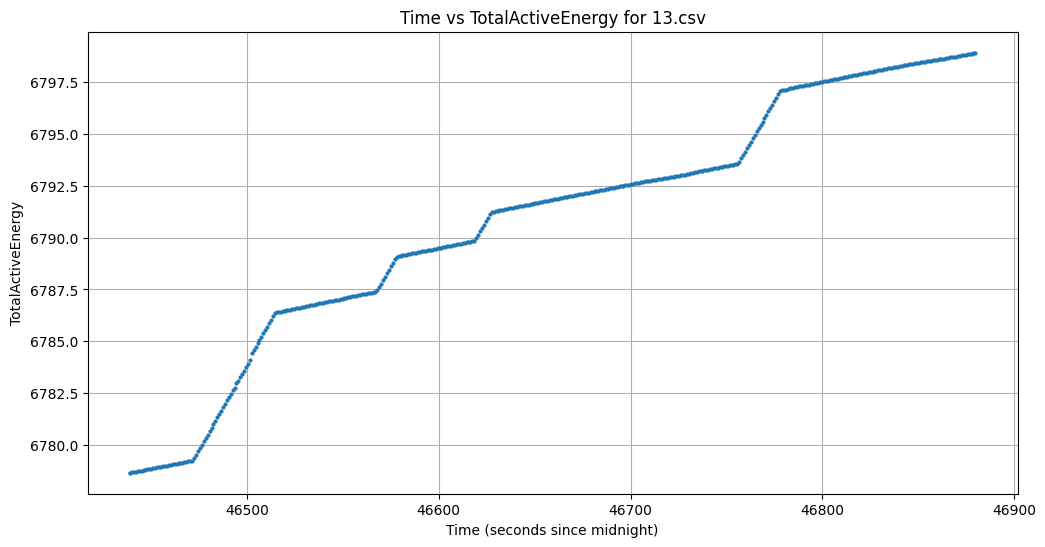

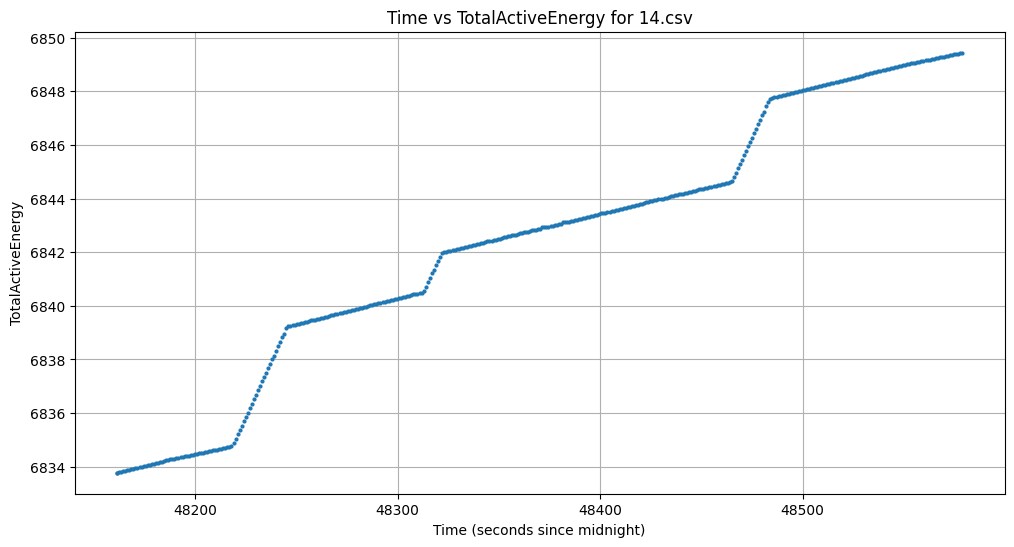

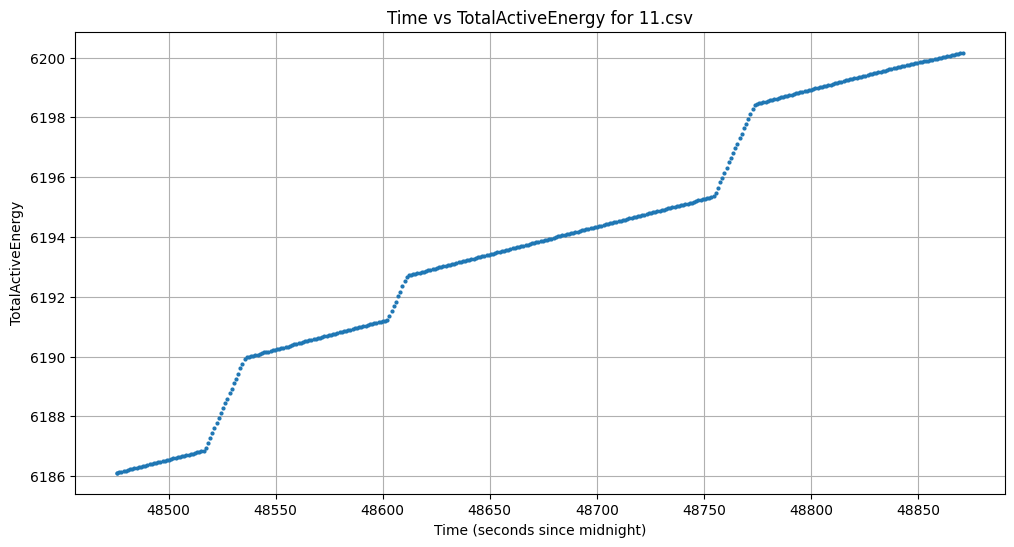

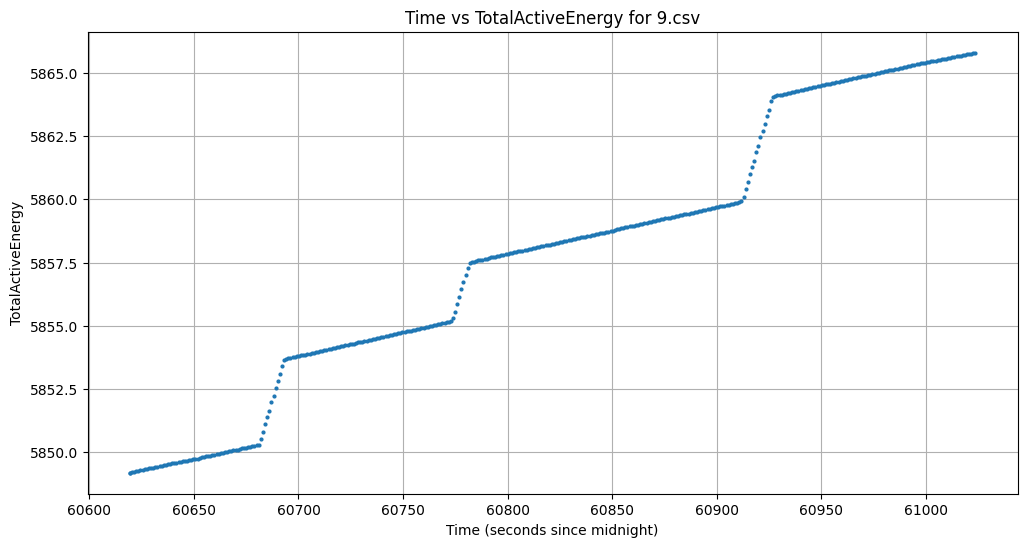

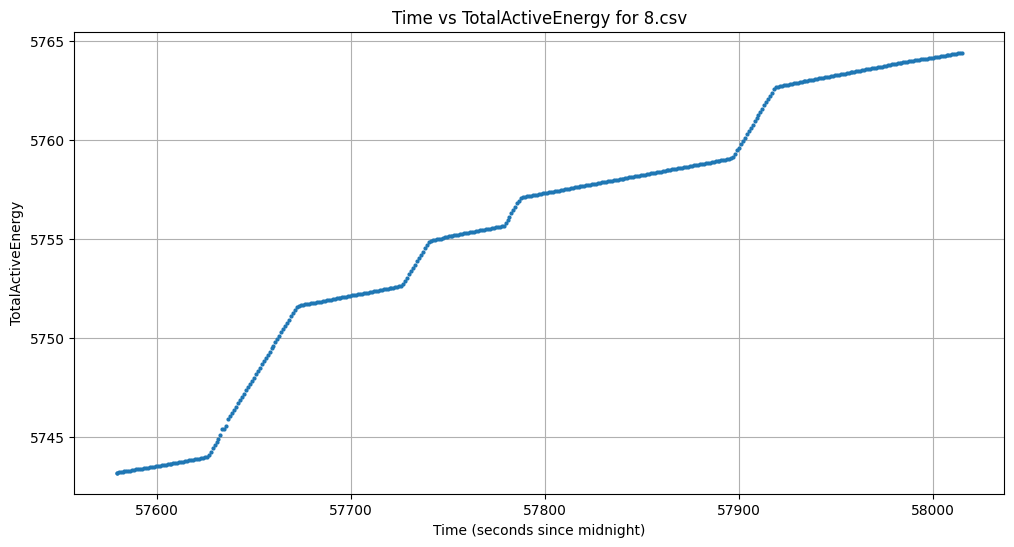

All files have been processed and plots are displayed.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

folder_path = '/project3/MyDrive/Colab Notebooks/EnergyDataFiles'


def time_to_seconds(time_str):
    try:
        return (datetime.strptime(time_str, '%H:%M:%S.%f') - datetime.strptime('00:00:00.0', '%H:%M:%S.%f')).total_seconds()
    except ValueError:
        return (datetime.strptime(time_str, '%H:%M:%S') - datetime.strptime('00:00:00', '%H:%M:%S')).total_seconds()

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  
        file_path = os.path.join(folder_path, filename)

        data = pd.read_csv(file_path)
        
        data = data.drop(0).reset_index(drop=True)
        
        data['Time'] = data['Time'].astype(str)
        
        data['TimeInSeconds'] = data['Time'].apply(time_to_seconds)

        data['value'] = pd.to_numeric(data['value'], errors='coerce')

        data = data.dropna(subset=['TimeInSeconds', 'value'])

        plt.figure(figsize=(12, 6))
        plt.plot(data['TimeInSeconds'], data['value'], marker='o', linestyle='', markersize=2)
        plt.title(f'Time vs TotalActiveEnergy for {filename}')
        plt.xlabel('Time (seconds since midnight)')
        plt.ylabel('TotalActiveEnergy')
        plt.grid(True)
        plt.show()

        plt.close() 

print("All files have been processed and plots are displayed.")

In [ ]:
import pandas as pd
import numpy as np

folder_path = '/project3/MyDrive/Colab Notebooks/EnergyDataFiles'  
num_files = 27
num_rows = 384


Dataset = np.empty((num_files, num_rows, 1))

for i in range(1, Dataset.shape[0] + 1):
    file_path = f'{folder_path}/{i}.csv'
    data = pd.read_csv(file_path, skiprows=(1, 2)).fillna(0)

    
    X = data['rActVal'].to_numpy()
    X = X[:384].reshape((384,1))

    
    Dataset[i - 1] = X

print(Dataset.shape)

(27, 384, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


data_reshaped = Dataset.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_reshaped)

scaled_Dataset = scaled_data.reshape(27, 384, 1)

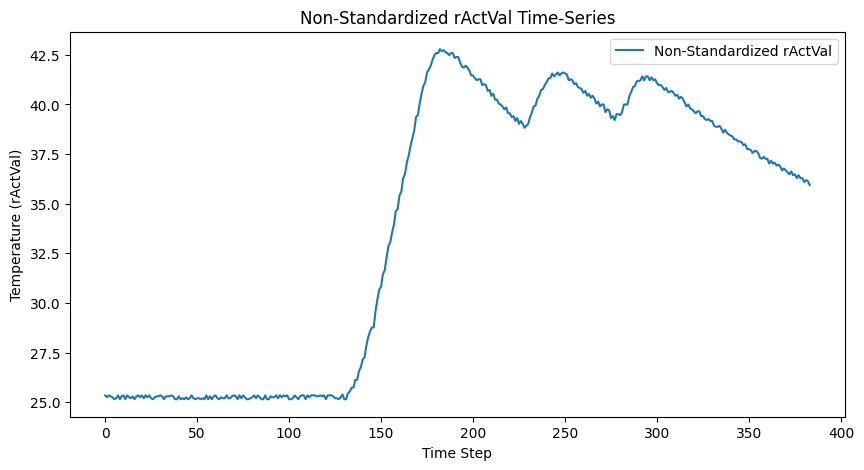

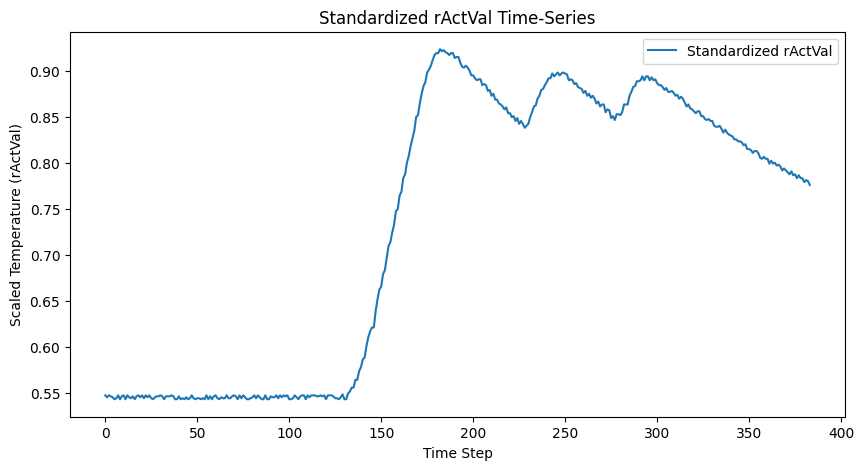

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime


Dataset_rActVal_non_standardized = Dataset


Dataset_rActVal_scaled = scaled_Dataset

# Plotting Non-Standardized rActVal Time-Series
plt.figure(figsize=(10, 5))
plt.plot(Dataset_rActVal_non_standardized[0].flatten(), label="Non-Standardized rActVal")
plt.title('Non-Standardized rActVal Time-Series')
plt.xlabel('Time Step')
plt.ylabel('Temperature (rActVal)')
plt.legend()
plt.show()

# Plotting Standardized rActVal Time-Series
plt.figure(figsize=(10, 5))
plt.plot(Dataset_rActVal_scaled[0].flatten(), label="Standardized rActVal")
plt.title('Standardized rActVal Time-Series')
plt.xlabel('Time Step')
plt.ylabel('Scaled Temperature (rActVal)')
plt.legend()
plt.show()

# Plotting Non-Standardized "value" Time-Series
#plt.figure(figsize=(10, 5))
#plt.plot(Dataset_Value_non_standardized[0].flatten(), label="Non-Standardized Total Active Energy")
#plt.title('Non-Standardized Total Active Energy Time-Series')
#plt.xlabel('Time Step')
#plt.ylabel('Energy Consumption (value)')
#plt.legend()
#plt.show()

# Plotting Standardized "value" Time-Series
#plt.figure(figsize=(10, 5))
#plt.plot(Dataset_Value_scaled[0].flatten(), label="Standardized Total Active Energy")
#plt.title('Standardized Total Active Energy Time-Series')
#plt.xlabel('Time Step')
#plt.ylabel('Scaled Energy Consumption (value)')
#plt.legend()
#plt.show()

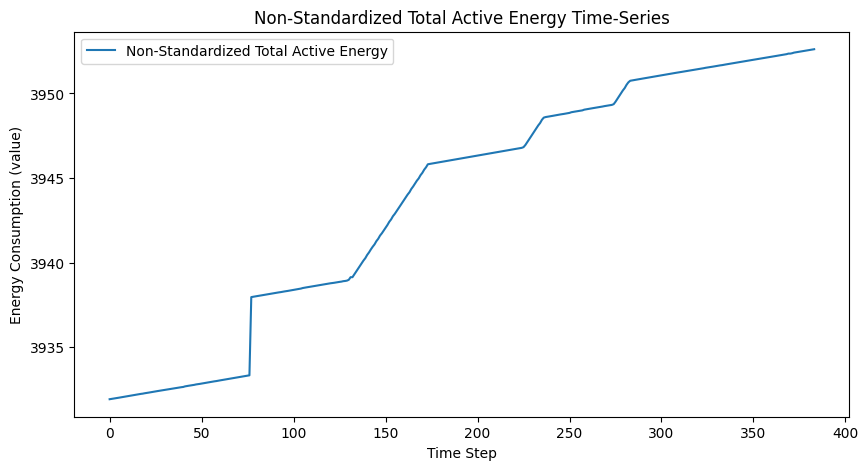

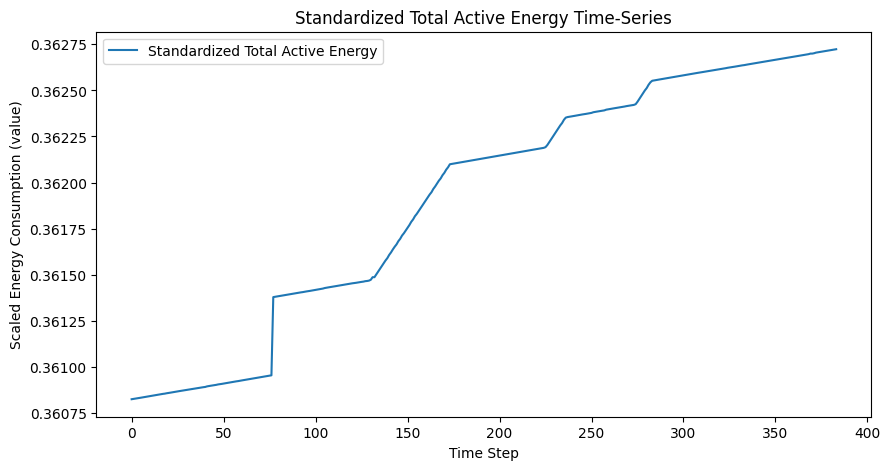

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import numpy as np


Dataset_rActVal_non_standardized = Dataset


Dataset_rActVal_scaled = scaled_Dataset

folder_path = '/project3/MyDrive/Colab Notebooks/EnergyDataFiles'  # Replace with the path to your folder
num_files = 27
num_rows = 384


Dataset_Value_non_standardized = np.empty((num_files, num_rows, 1))

for i in range(1, Dataset_Value_non_standardized.shape[0] + 1):
    file_path = f'{folder_path}/{i}.csv'
    data = pd.read_csv(file_path, skiprows=(1, 2)).fillna(0)

    
    X = data['value'].to_numpy() 
    X = X[:384].reshape((384, 1))

    # Assign the processed data to the dataset
    Dataset_Value_non_standardized[i - 1] = X




from sklearn.preprocessing import MinMaxScaler


data_reshaped_value = Dataset_Value_non_standardized.reshape(-1, 1)


scaler_value = MinMaxScaler()


scaled_data_value = scaler_value.fit_transform(data_reshaped_value)


Dataset_Value_scaled = scaled_data_value.reshape(27, 384, 1)



plt.figure(figsize=(10, 5))
plt.plot(Dataset_Value_non_standardized[0].flatten(), label="Non-Standardized Total Active Energy")
plt.title('Non-Standardized Total Active Energy Time-Series')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (value)')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(Dataset_Value_scaled[0].flatten(), label="Standardized Total Active Energy")
plt.title('Standardized Total Active Energy Time-Series')
plt.xlabel('Time Step')
plt.ylabel('Scaled Energy Consumption (value)')
plt.legend()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.2 MB/s eta 0:00:00
[1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1]


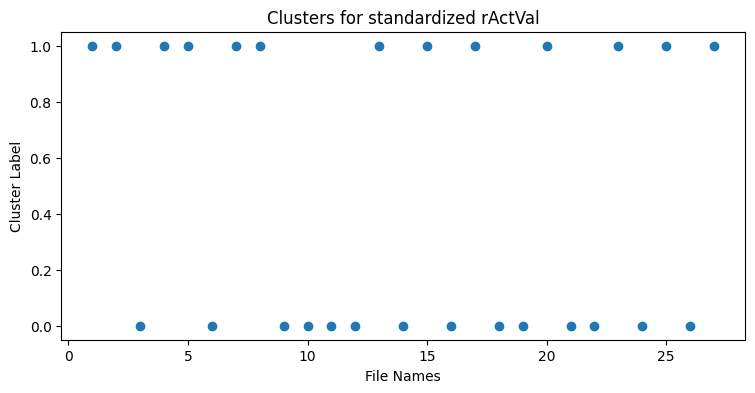

The silhouette_score is 0.29
The calinski_harabasz_score is 12.95


In [ ]:
!pip install tslearn
import matplotlib.pyplot
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from sklearn import metrics


fileNames = np.arange(1,28,1)


StdDataset = scaled_Dataset.squeeze()

from tslearn.clustering import TimeSeriesKMeans
TSkmeans = TimeSeriesKMeans(n_clusters=2, metric="dtw")
TSlabel = TSkmeans.fit_predict(StdDataset)
print(TSlabel)

#plot
plt.figure(figsize=(30, 4))
plt.subplot(132)
plt.scatter(fileNames, TSlabel)
plt.title("Clusters for standardized rActVal")
plt.xlabel("File Names")
plt.ylabel("Cluster Label")
plt.show()

#print out metrics for Unsupervised ML algorithms
silScore = metrics.silhouette_score(StdDataset, TSlabel)
calScore = metrics.calinski_harabasz_score(StdDataset, TSlabel)
print(f"The silhouette_score is {silScore:.02f}")
print(f"The calinski_harabasz_score is {calScore:.02f}")

[1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1]


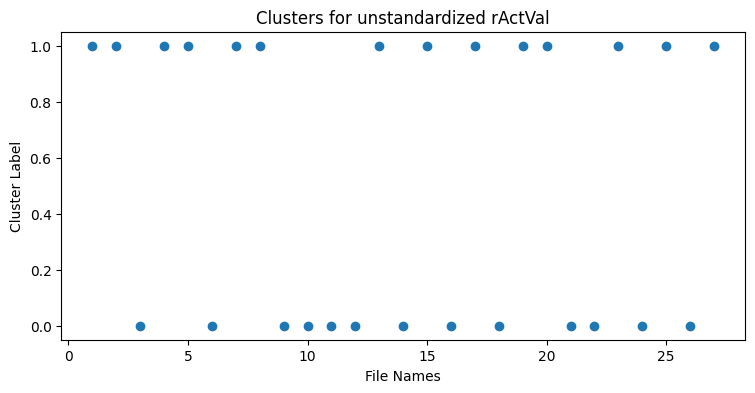

The silhouette_score is 0.26
The calinski_harabasz_score is 12.08


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from sklearn import metrics


fileNames = np.arange(1,28,1)


StdDataset = Dataset.squeeze()

TSkmeans = TimeSeriesKMeans(n_clusters=2, metric="dtw")
TSlabel = TSkmeans.fit_predict(StdDataset)
print(TSlabel)

#plot
plt.figure(figsize=(30, 4))
plt.subplot(132)
plt.scatter(fileNames, TSlabel)
plt.title("Clusters for unstandardized rActVal")
plt.xlabel("File Names")
plt.ylabel("Cluster Label")
plt.show()


silScore = metrics.silhouette_score(StdDataset, TSlabel)
calScore = metrics.calinski_harabasz_score(StdDataset, TSlabel)
print(f"The silhouette_score is {silScore:.02f}")
print(f"The calinski_harabasz_score is {calScore:.02f}")

In [ ]:
import pandas as pd
import numpy as np

folder_path = '/project3/MyDrive/Colab Notebooks/EnergyDataFiles'  # Replace with the path to your folder
num_files = 27
num_rows = 384

# Initialize an empty dataset
Dataset = np.empty((num_files, num_rows, 1))

for i in range(1, Dataset.shape[0] + 1):
    
    file_path = f'{folder_path}/{i}.csv'
    data = pd.read_csv(file_path, skiprows=(1, 2)).fillna(0)

    
    X = data['value'].to_numpy()
    X = X[:384].reshape((384,1))

    
    Dataset[i - 1] = X


print(Dataset.shape)

(27, 384, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data_reshaped = Dataset.reshape(-1, 1)

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data_reshaped)

scaled_Dataset = scaled_data.reshape(27, 384, 1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


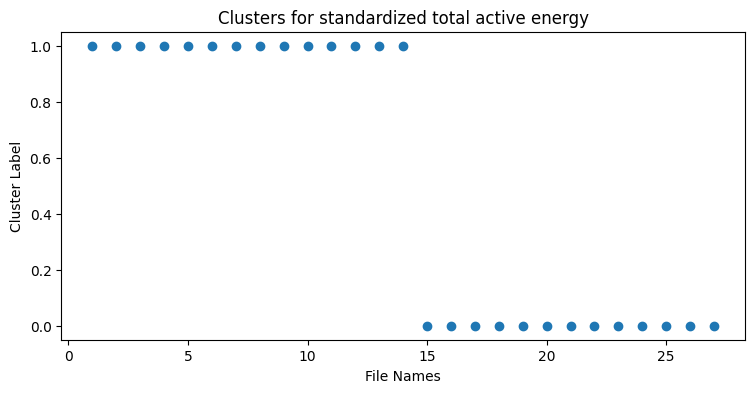

The silhouette_score is 0.65
The calinski_harabasz_score is 82.04


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from sklearn import metrics

fileNames = np.arange(1,28,1)


StdDataset = scaled_Dataset.squeeze()

TSkmeans = TimeSeriesKMeans(n_clusters=2, metric="dtw")
TSlabel = TSkmeans.fit_predict(StdDataset)
print(TSlabel)

#plot
plt.figure(figsize=(30, 4))
plt.subplot(132)
plt.scatter(fileNames, TSlabel)
plt.title("Clusters for standardized total active energy")
plt.xlabel("File Names")
plt.ylabel("Cluster Label")
plt.show()

#print out metrics for Unsupervised ML algorithms
silScore = metrics.silhouette_score(StdDataset, TSlabel)
calScore = metrics.calinski_harabasz_score(StdDataset, TSlabel)
print(f"The silhouette_score is {silScore:.02f}")
print(f"The calinski_harabasz_score is {calScore:.02f}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


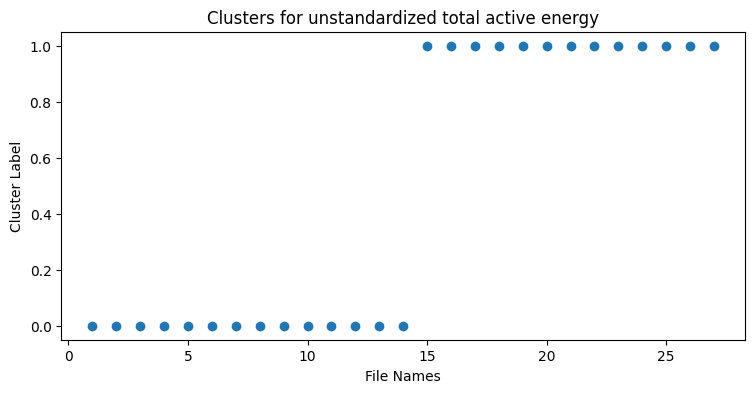

The silhouette_score is 0.65
The calinski_harabasz_score is 82.04


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from sklearn import metrics


fileNames = np.arange(1,28,1)


StdDataset = Dataset.squeeze()

TSkmeans = TimeSeriesKMeans(n_clusters=2, metric="dtw")
TSlabel = TSkmeans.fit_predict(StdDataset)
print(TSlabel)

#plot
plt.figure(figsize=(30, 4))
plt.subplot(132)
plt.scatter(fileNames, TSlabel)
plt.title("Clusters for unstandardized total active energy")
plt.xlabel("File Names")
plt.ylabel("Cluster Label")
plt.show()

#print out metrics for Unsupervised ML algorithms
silScore = metrics.silhouette_score(StdDataset, TSlabel)
calScore = metrics.calinski_harabasz_score(StdDataset, TSlabel)
print(f"The silhouette_score is {silScore:.02f}")
print(f"The calinski_harabasz_score is {calScore:.02f}")